In [97]:
import numpy as np

In [98]:
def backtracking(f, grad_f, x):
    """
    This function is a simple implementation of the backtracking algorithm for
    the GD (Gradient Descent) method.

    f: function. The function that we want to optimize.
    grad_f: function. The gradient of f(x).
    x: ndarray. The actual iterate x_k.
    """
    alpha = 1
    c = 0.8
    tau = 0.25

    while f(x - alpha * grad_f(x)) > f(x) - c * alpha * np.linalg.norm(grad_f(x)) ** 2:
        alpha = tau * alpha

        if alpha < 1e-3:
            break
    return alpha

In [99]:
def gradient_descent(f, grad_f, x_0, k_max, tol_f, tol_x, backtracking_func = None, alpha = .05):
    x_k = x_0

    k = 0
    f_vals = []
    grads = []
    errs = []
    x_ks = []


    norm = np.linalg.norm

    while k < k_max:
        k = k + 1

        x_prev = x_k

        if backtracking_func:
            alpha = backtracking_func(f, grad_f, x_k)

        x_k = x_k - alpha * grad_f(x_k)

        f_vals.append(f(x_k))
        grads.append(grad_f(x_k))
        errs.append(norm(grad_f(x_k)))
        x_ks.append(x_k)

        if norm(grad_f(x_k)) < tol_f * norm(grad_f(x_0)):
            break
        if norm(x_k - x_prev) < tol_x:
            break


    return x_k, k, f_vals, grads, errs, x_ks

In [100]:
from matplotlib import pyplot as plt


def plot_function_2D(f, range=(-5, 5), points=1000, ax=None):

    x = np.linspace(*range, points)
    y = f(x)

    if not ax:
        plt.xlabel("x")
        plt.ylabel("f(x)")
        plt.plot(x,y, 'r')

    else:
        ax.set_xlabel("x")
        ax.set_ylabel("f(x)")
        ax.plot(x,y, 'r')

def plot_gradient_descent_2D(x_ks, f_vals, ax=None, label=""):
    if ax:
        ax.scatter(x_ks, f_vals, label=label)
    else:
        plt.scatter(x_ks, f_vals, label=label)

def plot_function_3D(f, range_x=(-5, 5), range_y=(-5, 5), points_per_axis=100, ax=None):
    x_points = np.linspace(*range_x, points_per_axis)
    y_points = np.linspace(*range_y, points_per_axis)

    X, Y = np.meshgrid(x_points, y_points)
    Z = f((X, Y))


    if not ax:
        fig = plt.figure(figsize = (12, 12))
        ax = fig.add_subplot(projection='3d')

    ax.plot_surface(X, Y, Z, alpha=0.7)

def plot_gradient_descent_3D(x_ks, f_vals, ax=None):
    x_ks = np.array(x_ks)

    if not ax:
        plt.plot(x_ks[:,0], x_ks[:,1], f_vals,  "--ro")
    else:
        ax.plot(x_ks[:,0], x_ks[:,1], f_vals,  "--ro")

def plot_contour_and_gradient_descent(f, x_ks, range_x=(-5, 5), range_y=(-5, 5), points_per_axis=100, optimum=None, ax=None):
    x_points = np.linspace(*range_x, points_per_axis)
    y_points = np.linspace(*range_y, points_per_axis)

    X, Y = np.meshgrid(x_points, y_points)
    Z = f((X, Y))

    if not ax:
        fig = plt.figure(figsize = (12, 12))
        ax = fig.add_subplot()

    ax.contour(X, Y, Z)

    x_ks = np.array(x_ks)
    ax.plot(x_ks[:,0], x_ks[:,1], "--ro")

    if optimum:
        ax.plot(optimum[0], optimum[1], marker="x", markeredgecolor="green", markersize=20, markeredgewidth=5)

def plot_error(x_ks, x_true, ax=None, label=""):
    if not ax:
        fig = plt.figure(figsize = (6, 6))
        ax = fig.add_subplot()

    ax.set_ylabel("Error")
    ax.set_xlabel("Iteration")

    ax.plot([np.linalg.norm(x_k - x_true) for x_k in x_ks], label=label)

In [101]:
def plot_all(f, x_ks, f_vals, range_x, range_y, optimum, plot="no", title=""):
    if plot == "2d":
        fig = plt.figure(figsize = (12, 15))
        fig.suptitle(title)

        graph_ax = fig.add_subplot(2,1,1)
        graph_ax.set_title("Function in 2D with gradient descent points")

        error_ax = fig.add_subplot(2,1,2)
        error_ax.set_title("Error relative to x_true")

        plot_function_2D(f, range_x, ax=graph_ax)
        plot_gradient_descent_2D(x_ks, f_vals, ax=graph_ax)
        plot_error(x_ks, optimum, ax=error_ax)
    if plot == "3d":
        fig = plt.figure(figsize = (12, 20))
        fig.suptitle(title)

        graph_ax = fig.add_subplot(3,1,1, projection='3d')
        graph_ax.set_title("Function in 3D with gradient descent points")

        contour_ax = fig.add_subplot(3,1,2)
        contour_ax.set_title("Contour with gradient descent points")

        error_ax = fig.add_subplot(3,1,3)
        error_ax.set_title("Error relative to x_true")

        plot_function_3D(f, range_x=range_x, range_y=range_y, ax=graph_ax)
        plot_gradient_descent_3D(x_ks, f_vals, ax=graph_ax)
        plot_contour_and_gradient_descent(f, x_ks, range_x=range_x, range_y=range_y, optimum=optimum, ax=contour_ax)
        plot_error(x_ks, optimum, ax=error_ax)
    else:
        fig = plt.figure(figsize = (8, 8))
        fig.suptitle(title)
        error_ax = fig.add_subplot(1,1,1)

        plot_error(x_ks, optimum, ax=error_ax)

def plot_error_together(x_ks_n, x_true, labels):
    fig = plt.figure(figsize = (8, 8))
    fig.suptitle("Error given different alpha/backtracking")
    error_ax = fig.add_subplot(1,1,1)

    for x_ks, label in zip(x_ks_n, labels):
        plot_error(x_ks, x_true, ax=error_ax, label=label)

    error_ax.legend()

def plot_gradient_together(grads_n, labels):
    fig = plt.figure(figsize = (8, 8))
    fig.suptitle("Gradient convergence given different alpha/backtracking")

    error_ax = fig.add_subplot(1,1,1)
    error_ax.set_ylabel("Gradient")
    error_ax.set_xlabel("Iteration")

    for grads, label in zip(grads_n, labels):
        error_ax.plot([np.linalg.norm(grad) for grad in grads], label=label)

    error_ax.legend()

def test(f, grad_f, x_0, optimum, plot="no", range_x=(-5,5), range_y=(5,5)):
    x_ks_n = []
    grads_n = []
    labels = []

    x_k, k, f_vals, grads, errs, x_ks = gradient_descent(f, grad_f, x_0=x_0, k_max=1000, tol_f=1e-6, tol_x=1e-6, backtracking_func=backtracking)
    plot_all(f, x_ks, f_vals, range_x, range_y, optimum, plot, title=f"Backtracking")

    x_ks_n.append(x_ks)
    grads_n.append(grads)
    labels.append("Backtracking")

    alpha = 0.005
    x_k, k, f_vals, grads, errs, x_ks = gradient_descent(f, grad_f, x_0=x_0, k_max=1000, tol_f=1e-6, tol_x=1e-6, alpha=alpha)
    plot_all(f, x_ks, f_vals, range_x, range_y, optimum, plot, title=f"No backtracking, {alpha=}")

    x_ks_n.append(x_ks)
    grads_n.append(grads)
    labels.append(f"{alpha=}")


    alpha = 0.05
    x_k, k, f_vals, grads, errs, x_ks = gradient_descent(f, grad_f, x_0=x_0, k_max=1000, tol_f=1e-6, tol_x=1e-6, alpha=alpha)
    plot_all(f, x_ks, f_vals, range_x, range_y, optimum, plot, title=f"No backtracking, {alpha=}")

    x_ks_n.append(x_ks)
    grads_n.append(grads)
    labels.append(f"{alpha=}")

    plot_gradient_together(grads_n, labels)
    plot_error_together(x_ks_n, optimum, labels)

    plt.show()



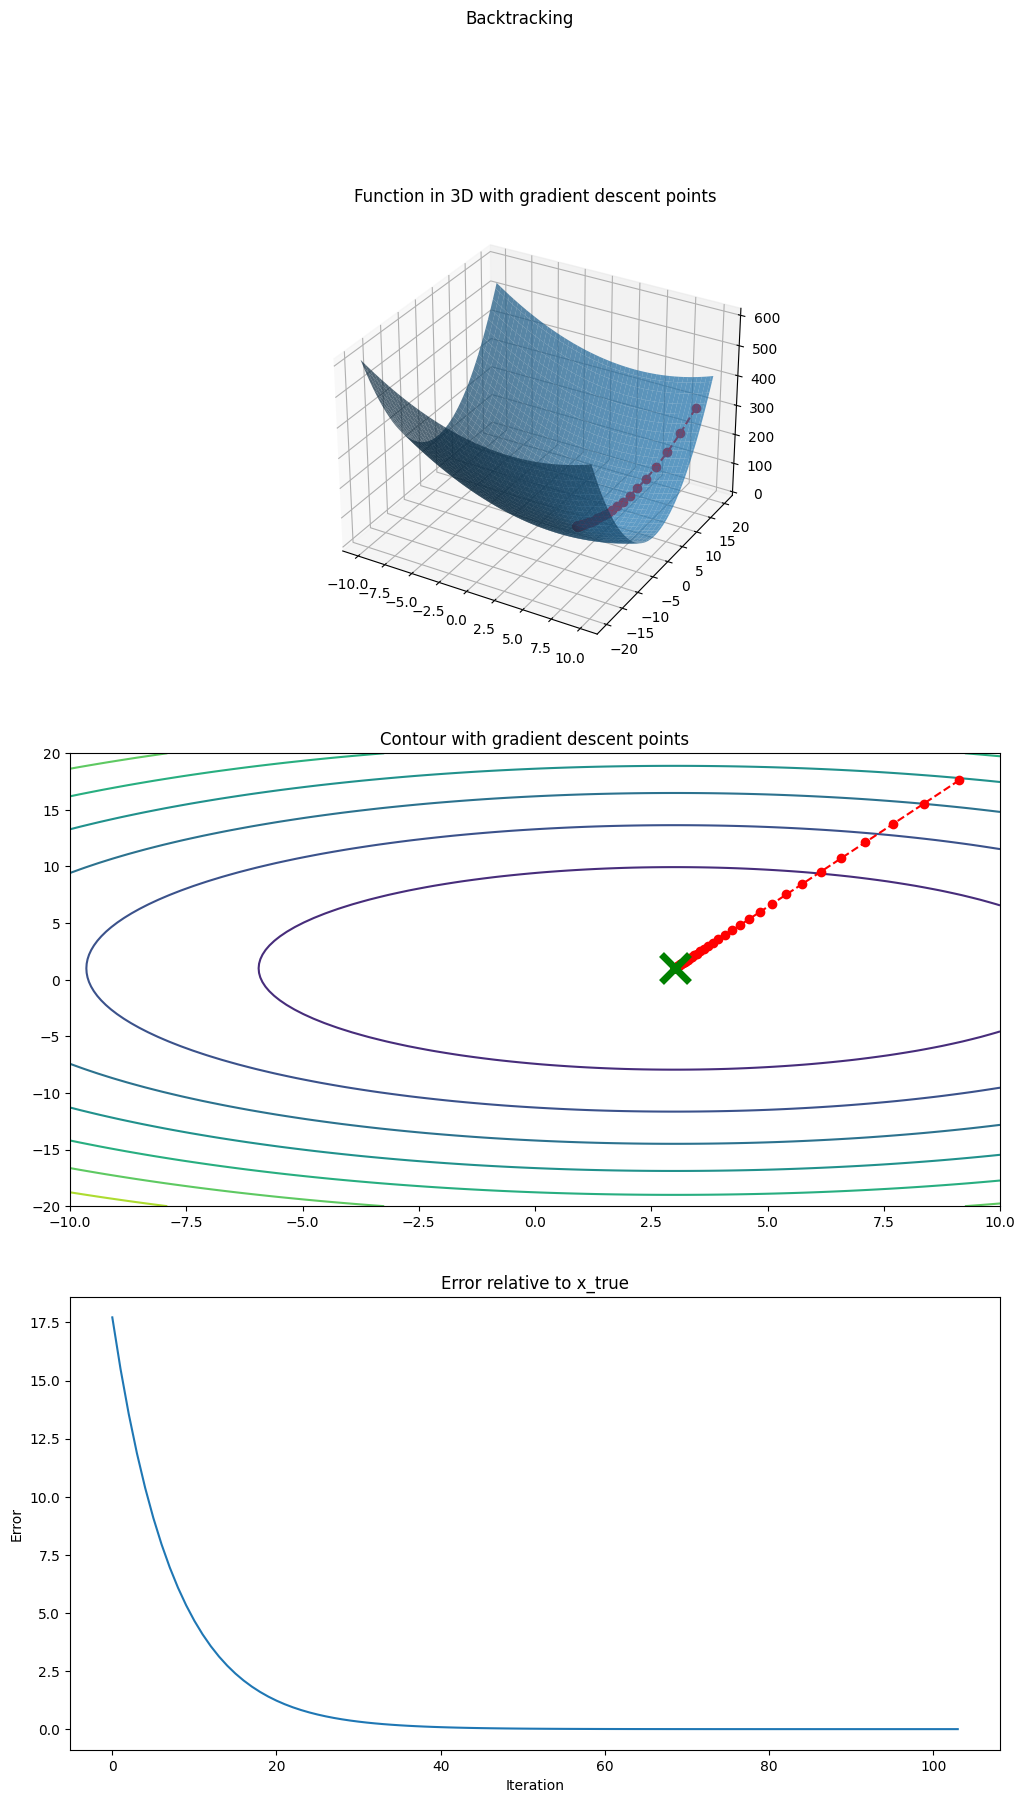

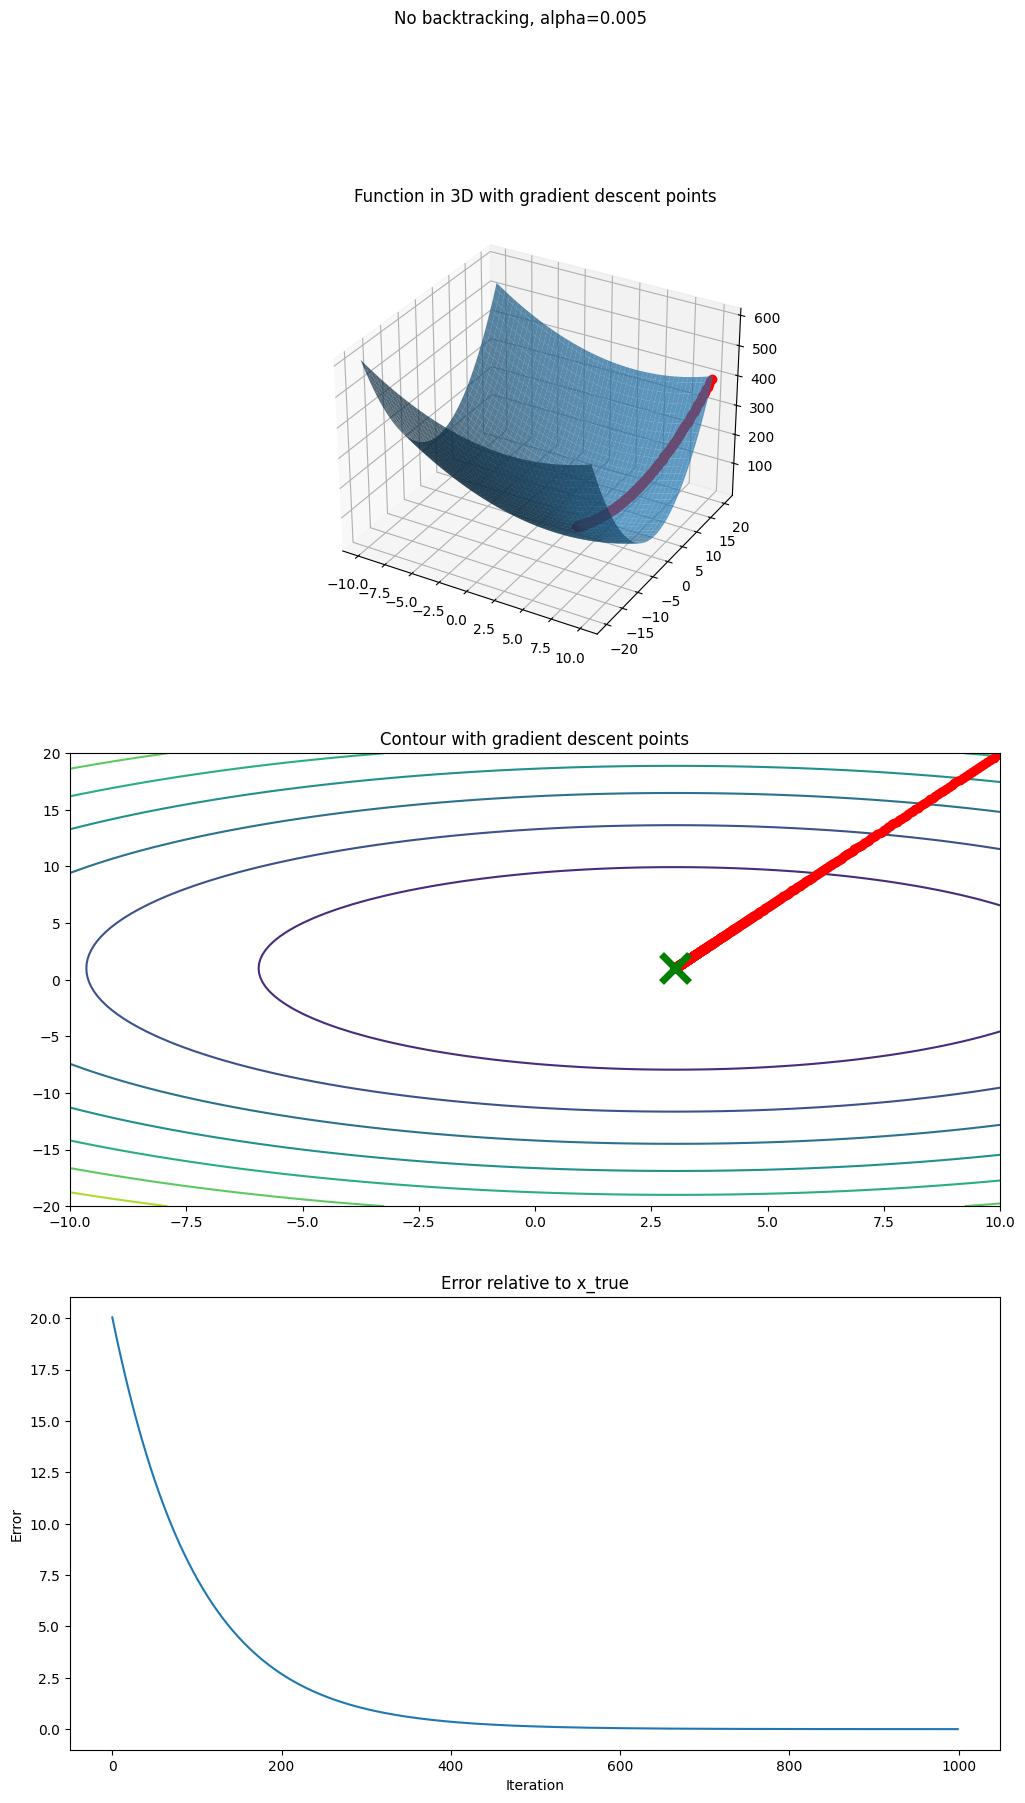

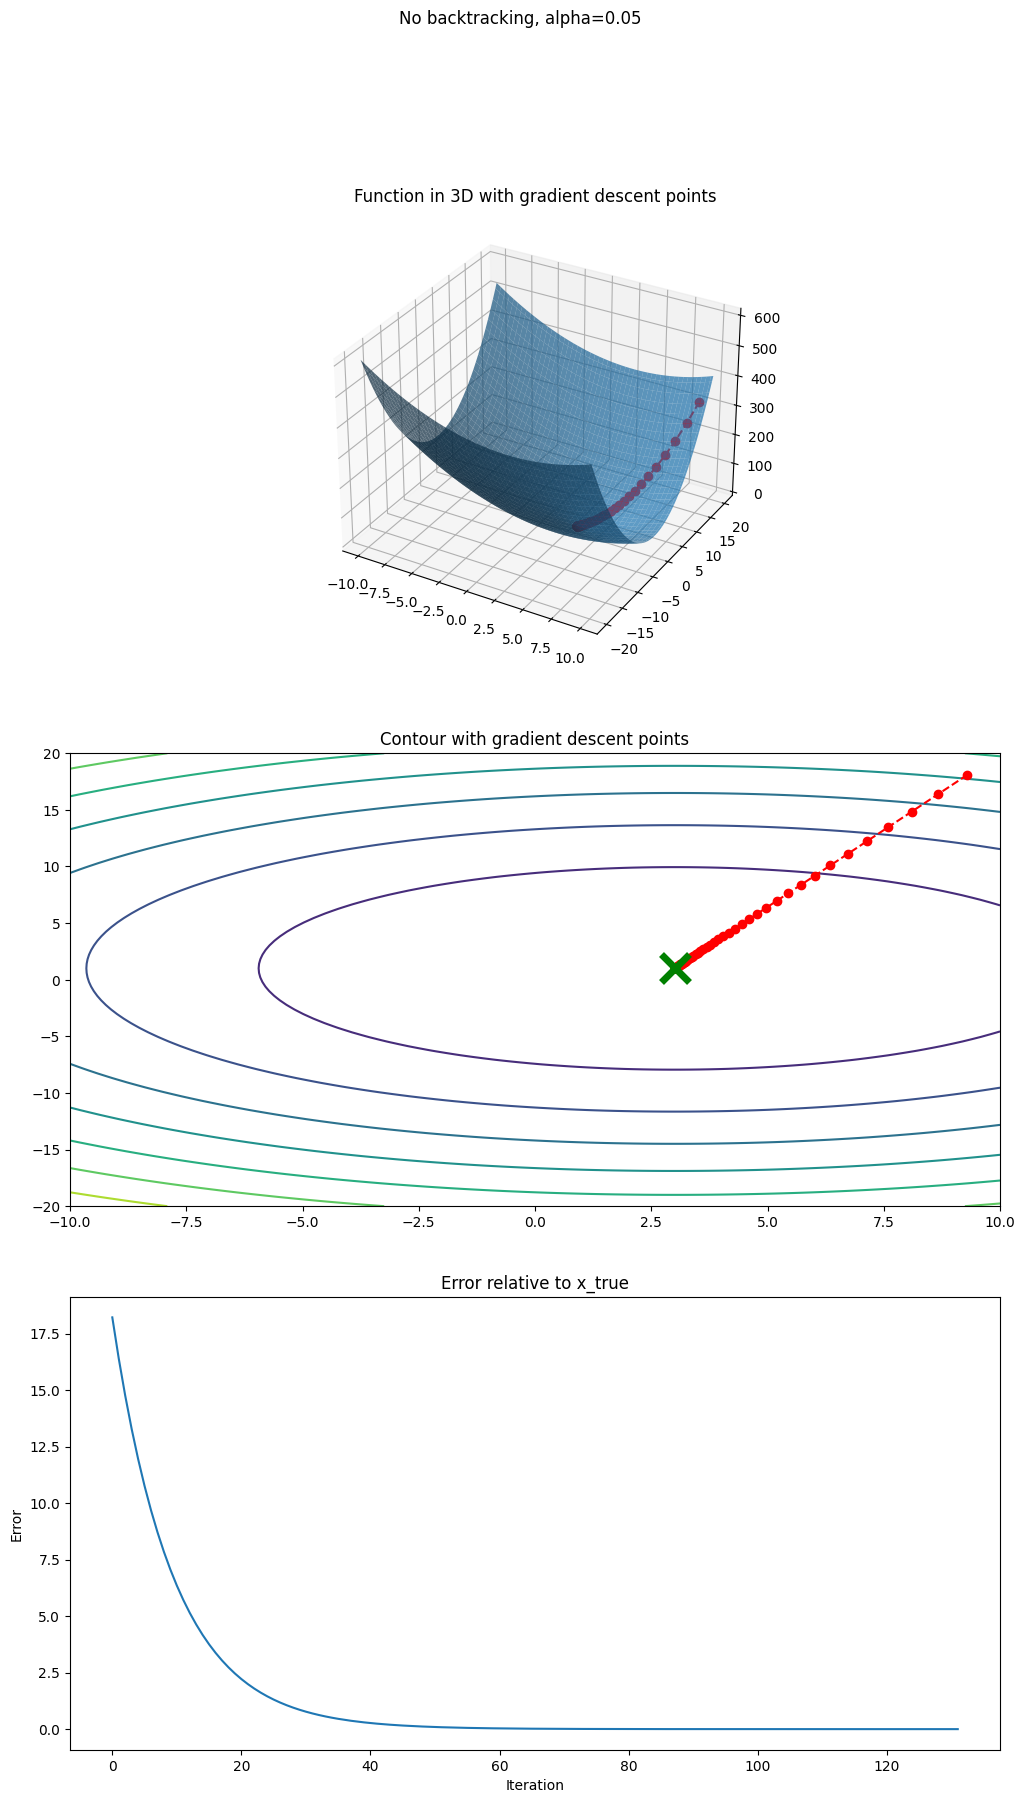

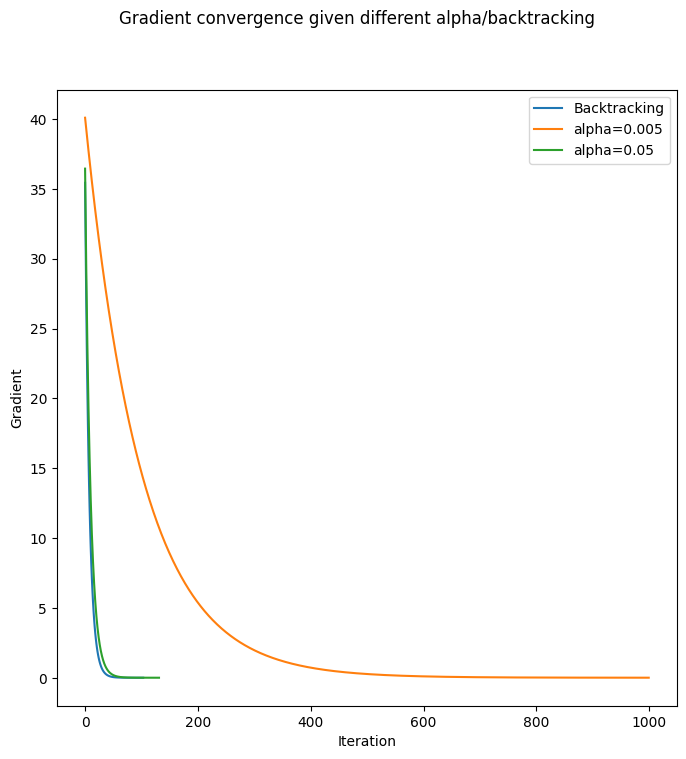

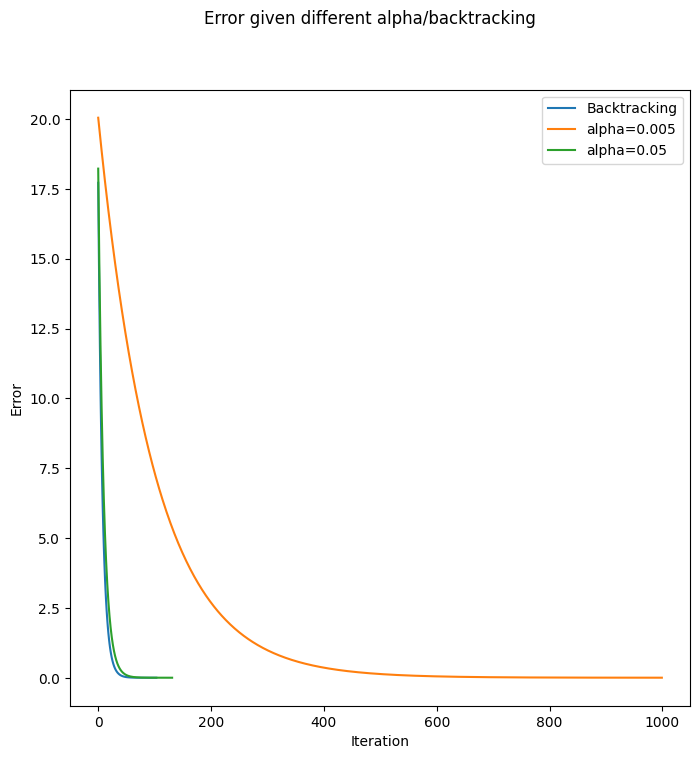

In [102]:
def f(x):
    # x^2 -6x + 9 + y^2 - 2y + 1

    x, y = x
    return (x - 3)**2 + (y - 1)**2

def grad_f(x):
    x, y = x
    return np.array((2 * x - 6, 2 * y - 2))

test(f, grad_f, x_0=(10,20), optimum=(3,1), range_x=(-10,10), range_y=(-20,20), plot="3d")


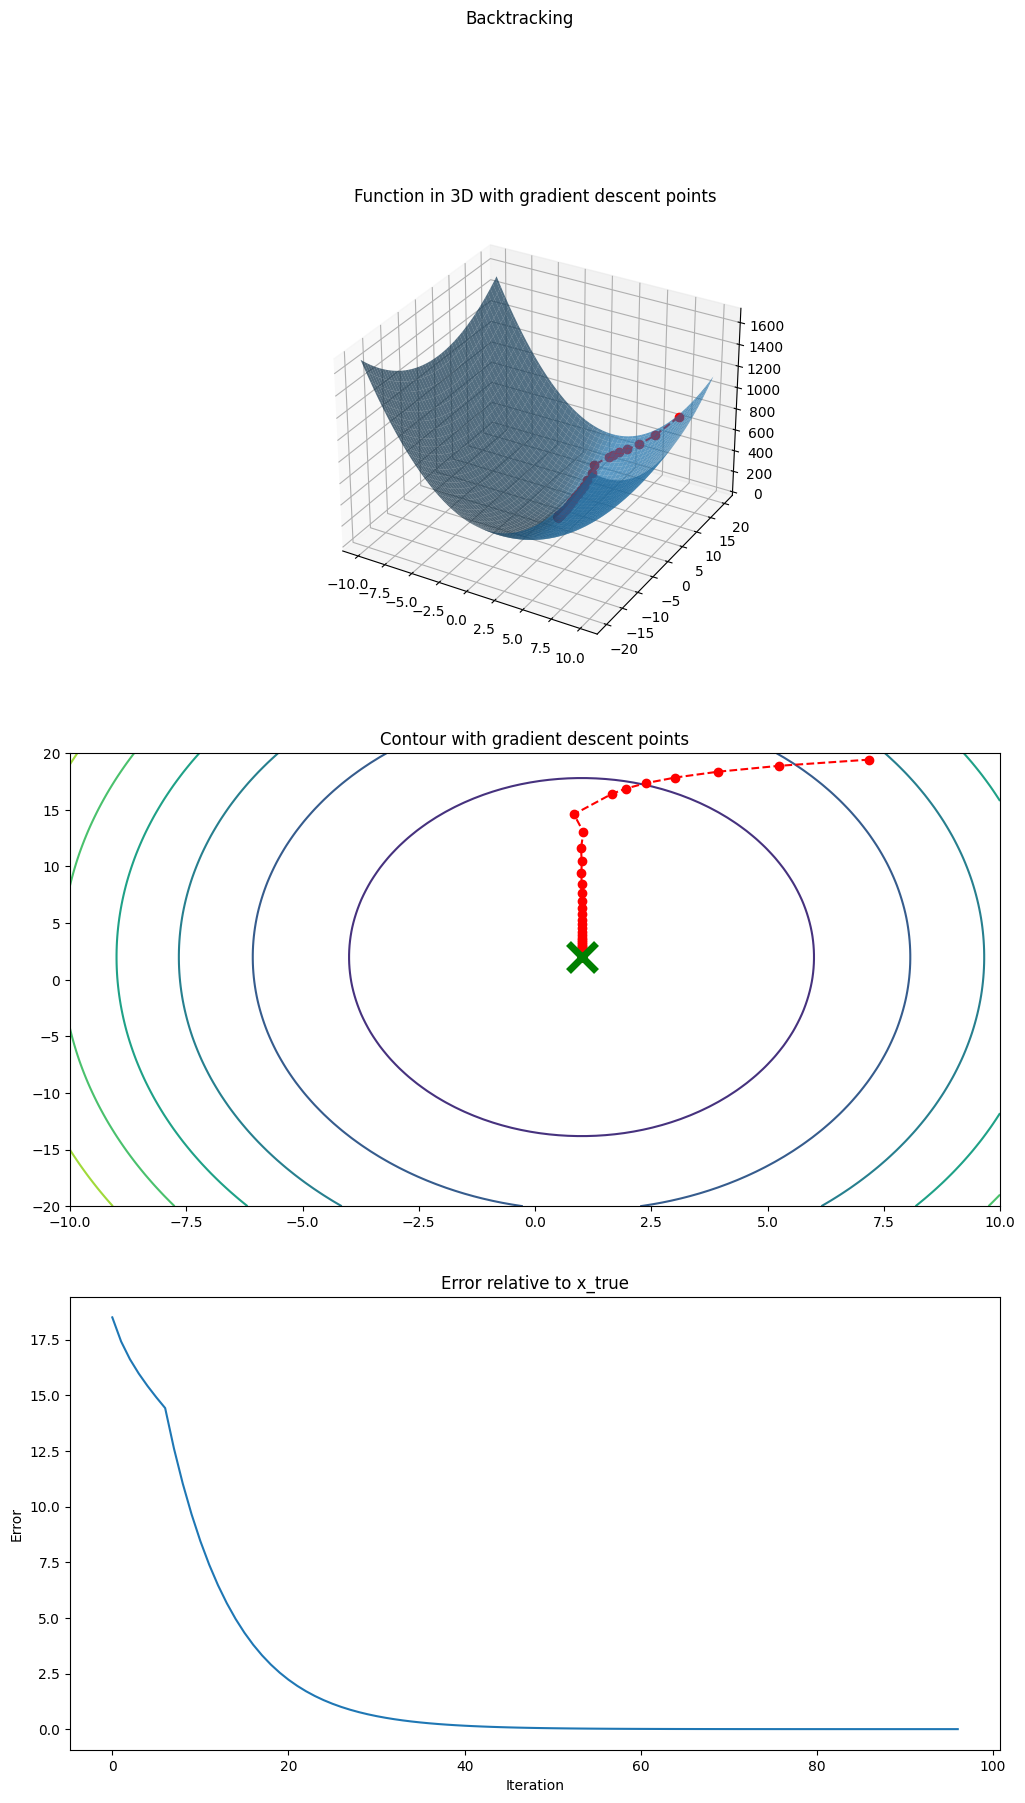

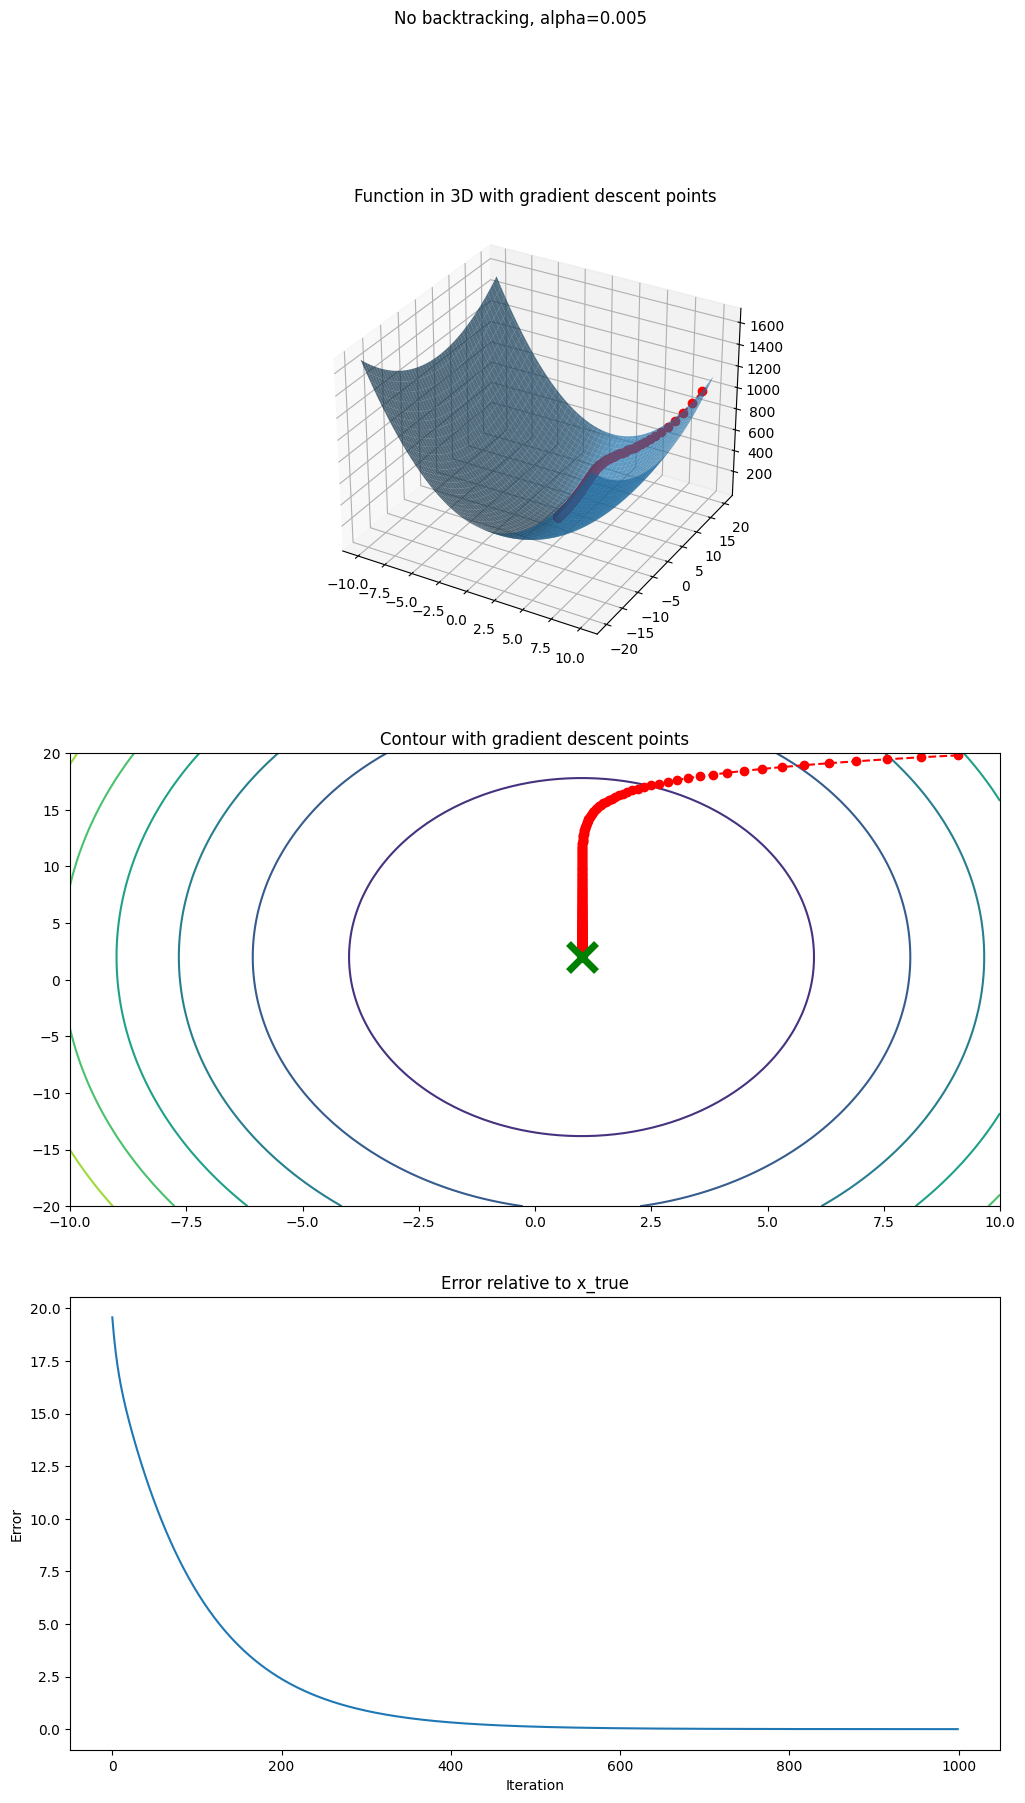

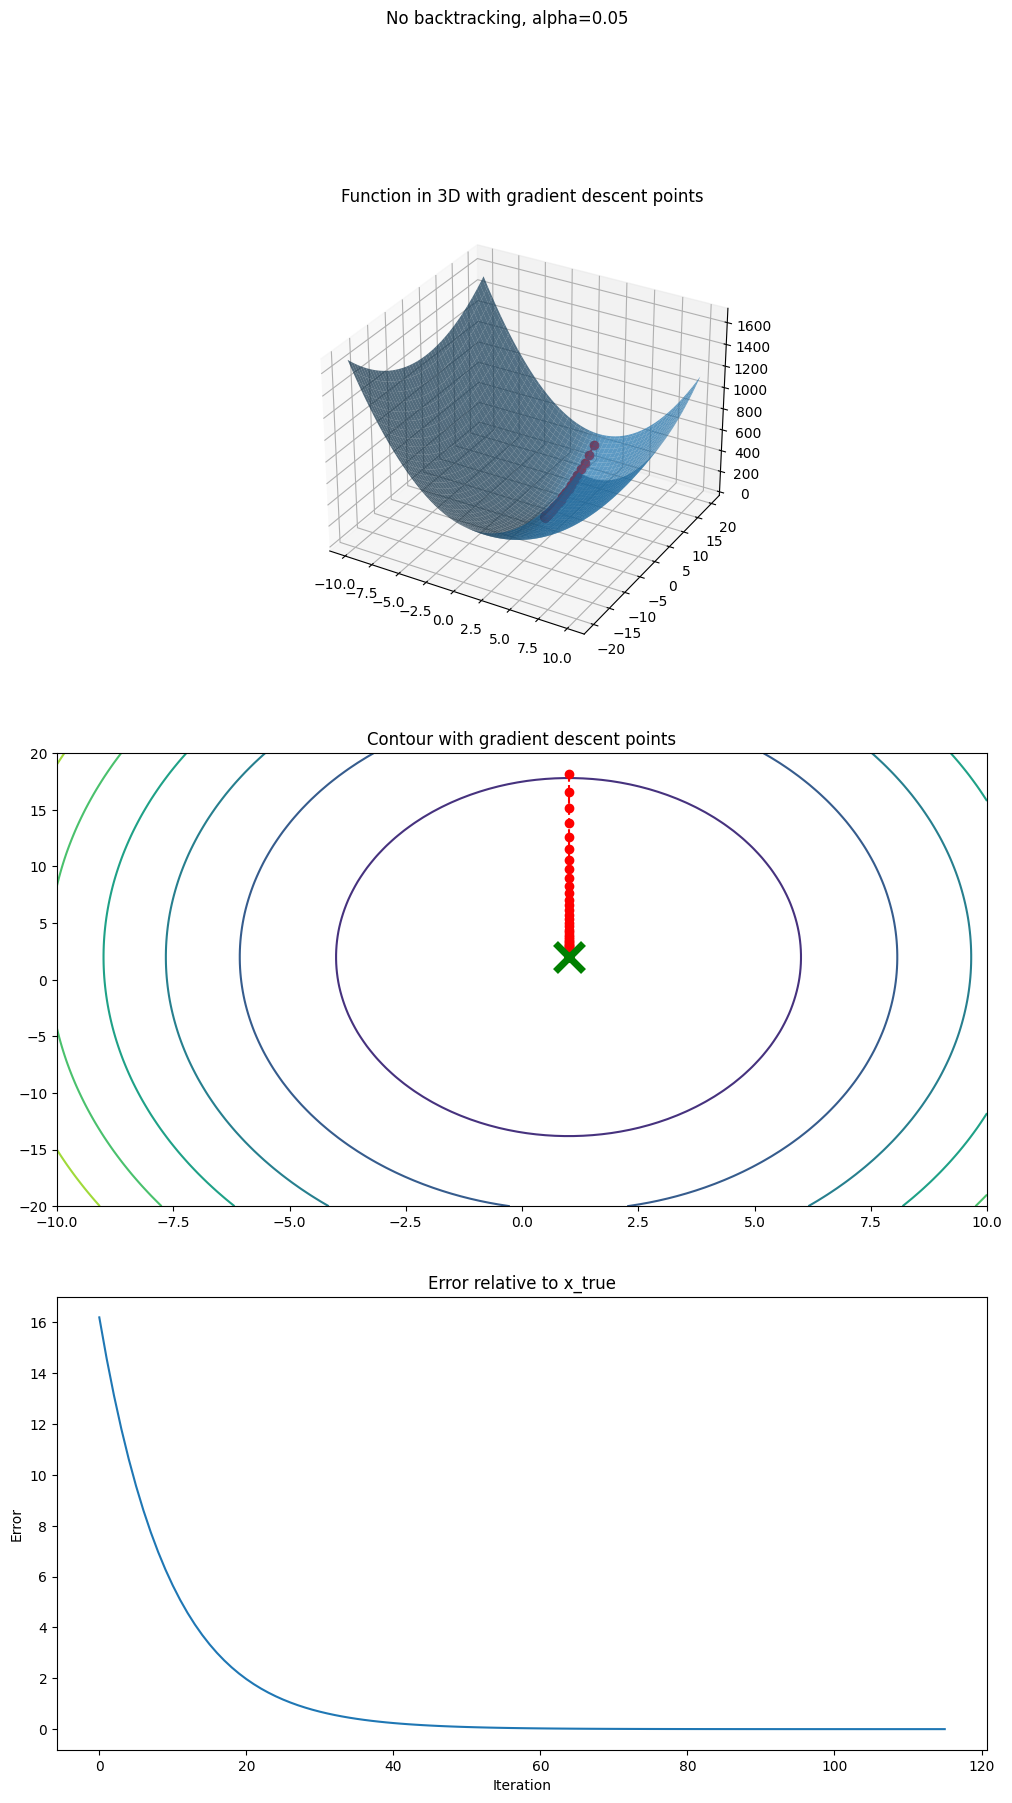

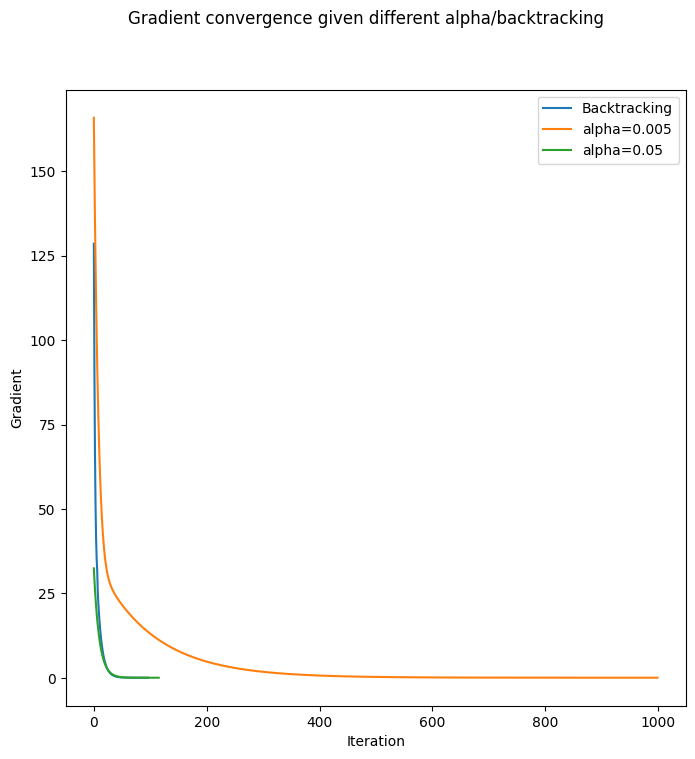

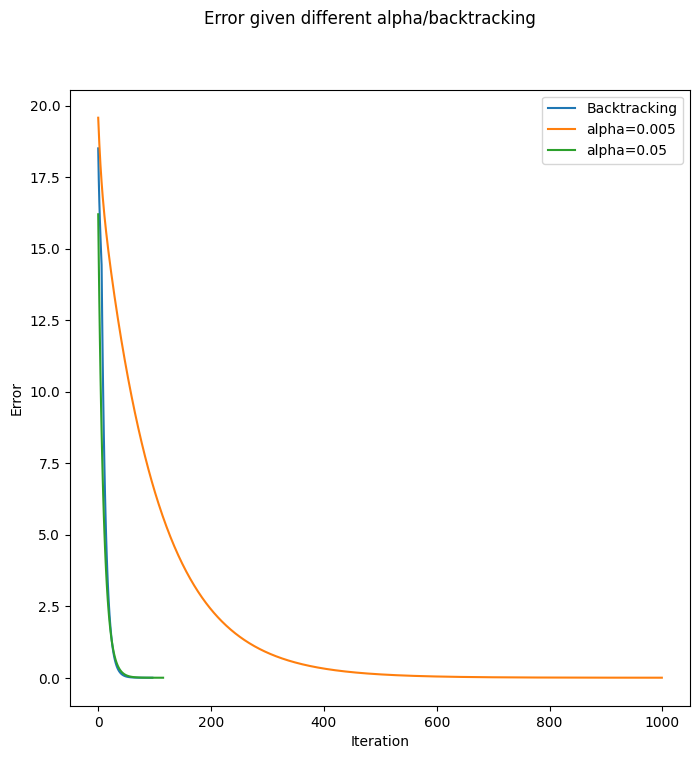

In [103]:
def f(x):
    # 10x^2 -20x +10 + y^2 -4y + 4
    x,y = x
    return 10 * (x - 1)**2 + (y - 2)**2

def grad_f(x):
    x,y = x
    return np.array((20*x -20, 2*y -4))

test(f, grad_f, x_0=(10,20), optimum=(1,2), range_x=(-10,10), range_y=(-20,20), plot="3d")


In [104]:
def vandermonde_n(n):

    v = np.linspace(0,1, n)
    A = np.vander(v)

    x_true = np.ones(n)
    b = A @ x_true

    def f(x):
        return 0.5 * np.linalg.norm(A @ x - b, 2) ** 2

    def grad_f(x):
        return (A @ x - b).T @ A

    return f, grad_f

def grad_of_function(f):
    import numdifftools as nd

    return nd.Gradient(f)

def test_vandermonde_n(n):
    f, grad_f = vandermonde_n(n)
    x_0 = np.zeros(n)
    x_true = np.ones(n)

    test(f, grad_f, x_0=x_0, optimum=x_true)

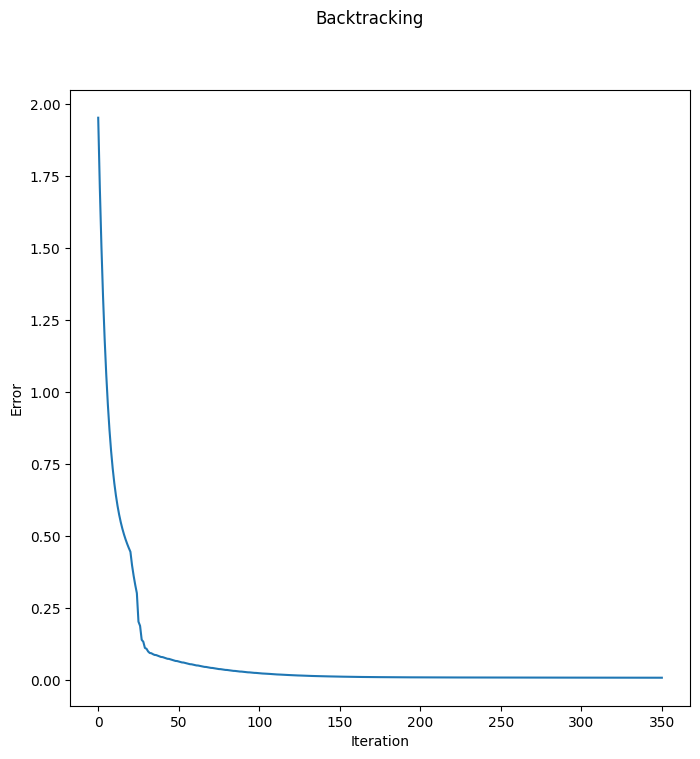

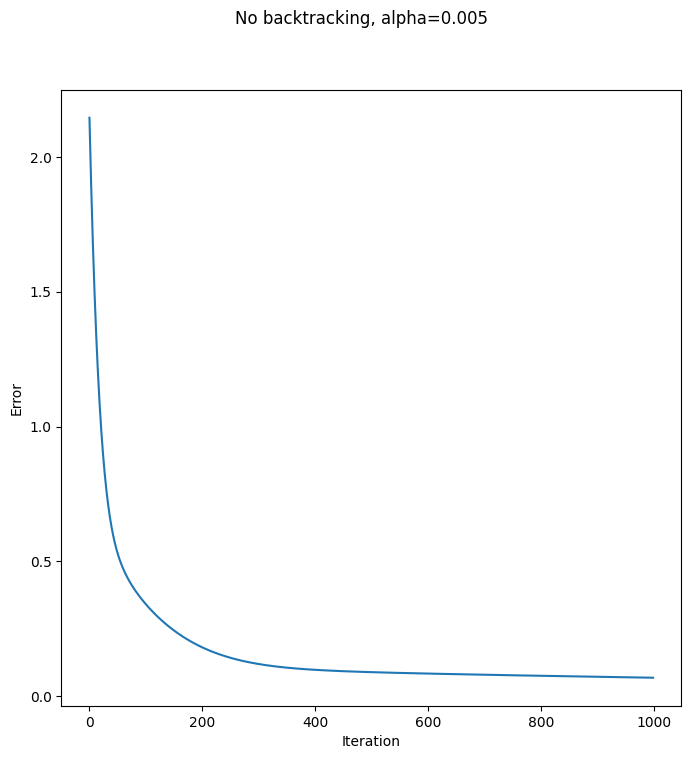

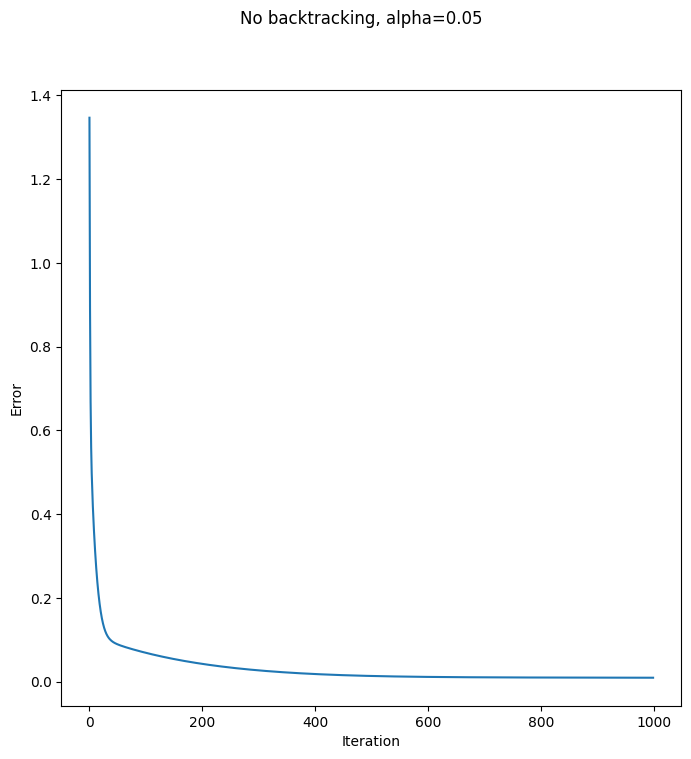

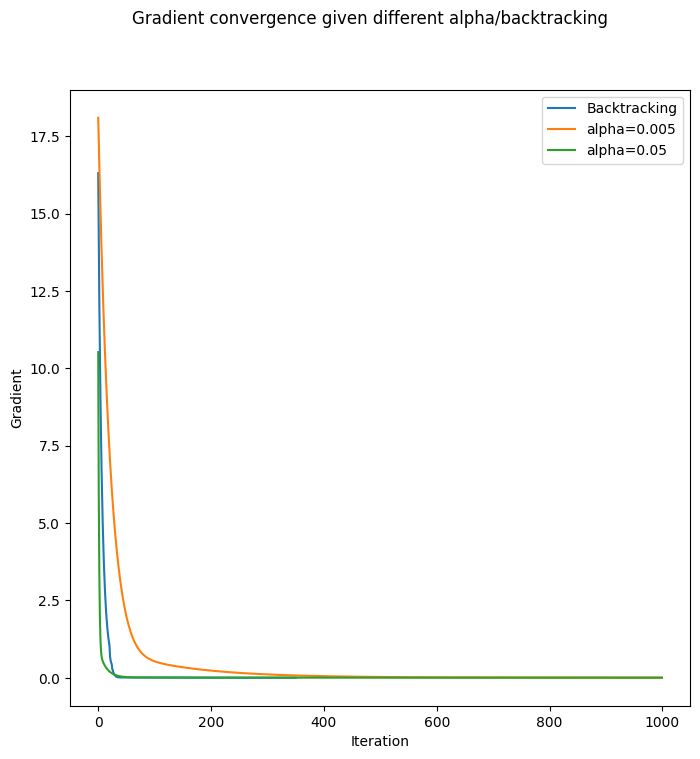

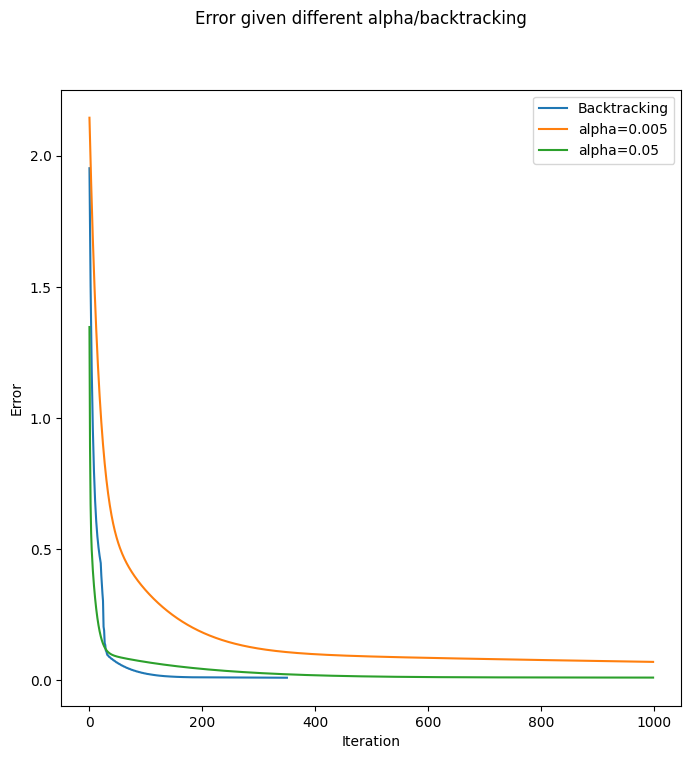

In [105]:
test_vandermonde_n(5)

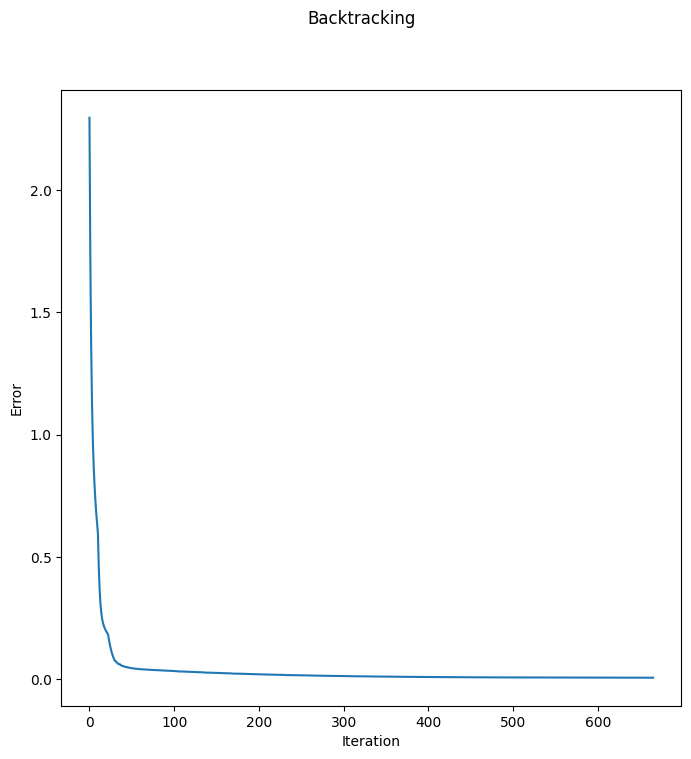

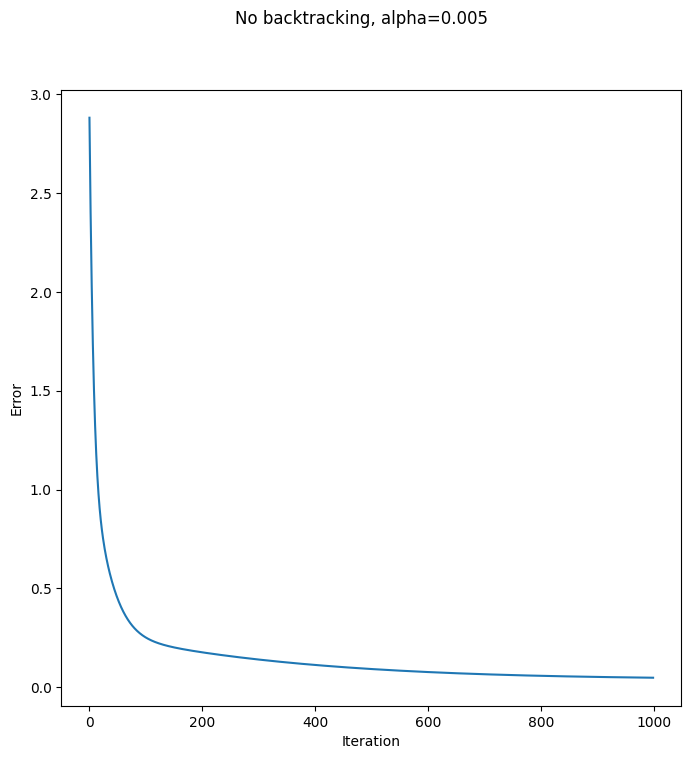

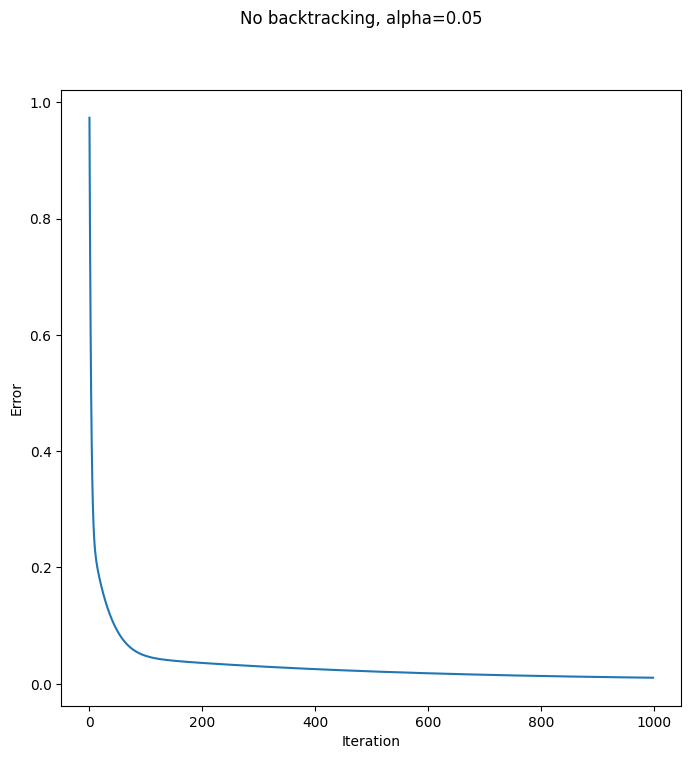

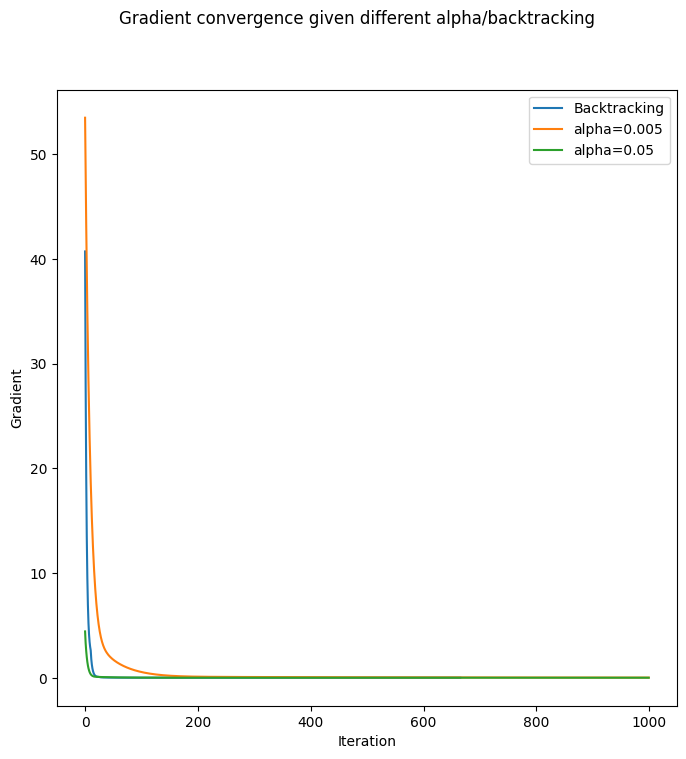

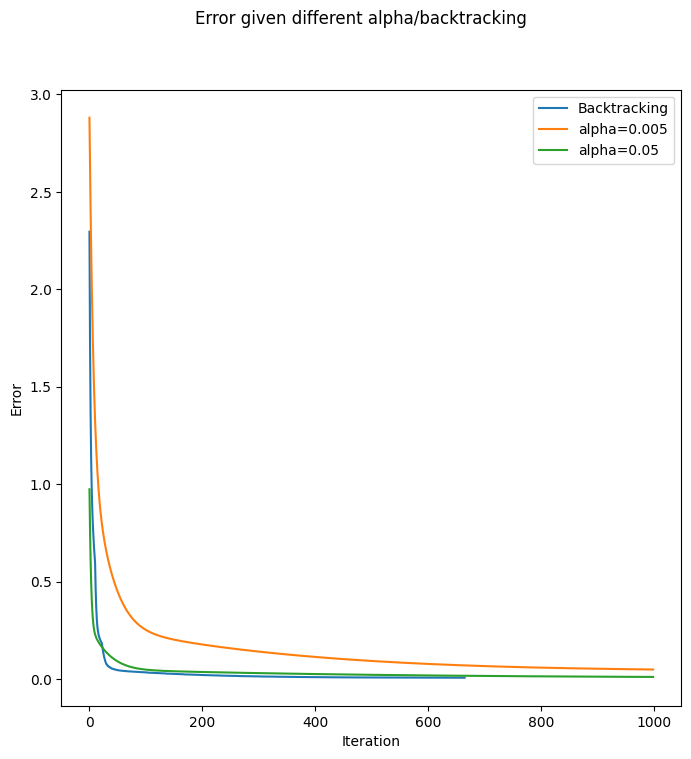

In [106]:
test_vandermonde_n(10)

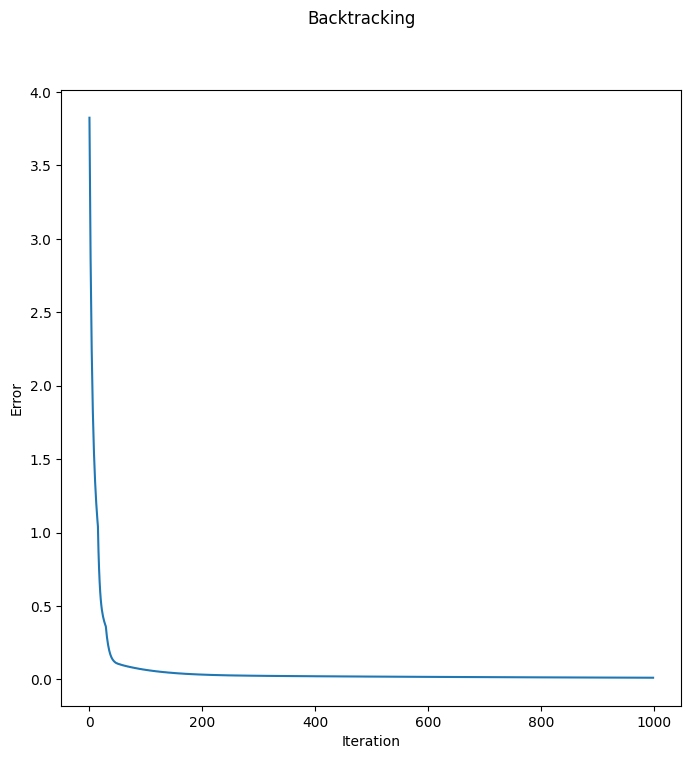

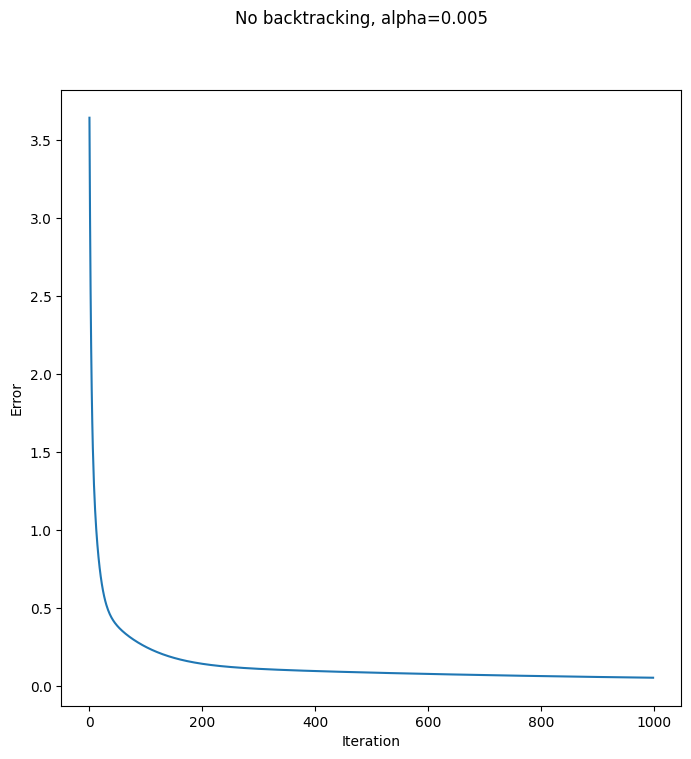

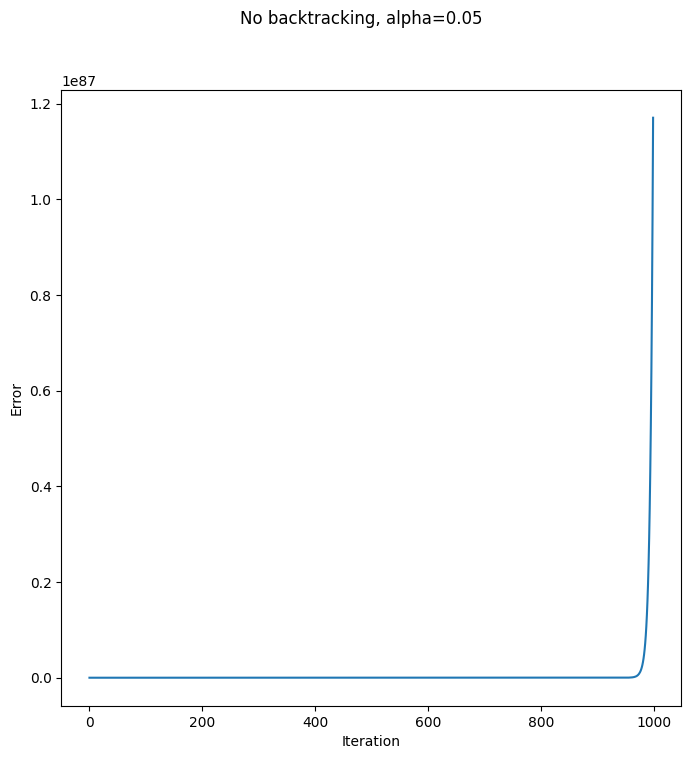

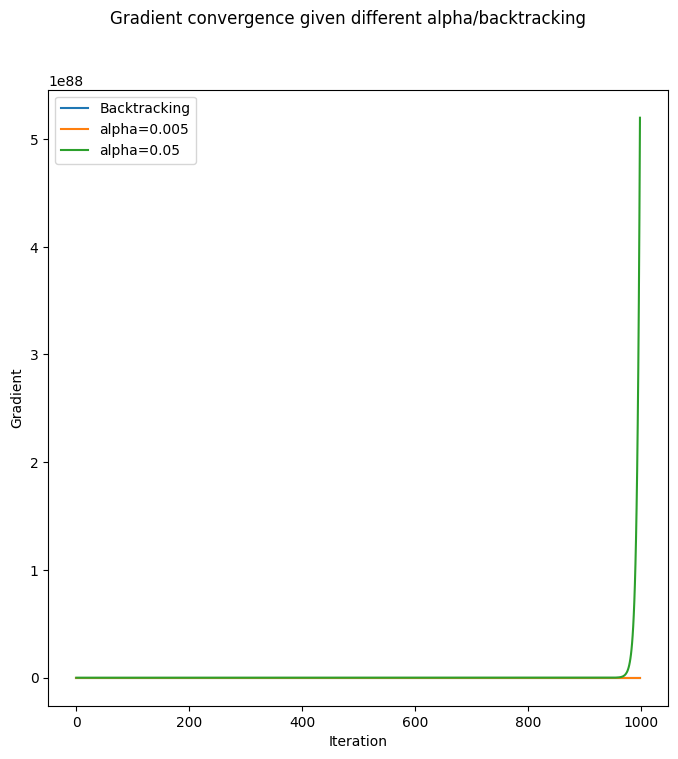

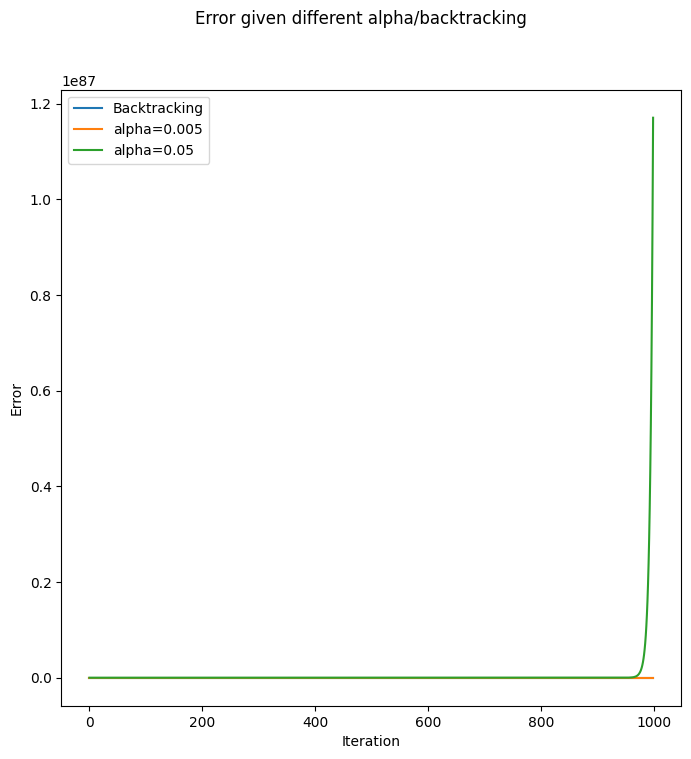

In [107]:
test_vandermonde_n(20)

In [108]:

def expanded_vandermonde_n(n, lmba = 0.5):
    vander_n, grad_vander_n = vandermonde_n(n)
    def f(x):
        return vander_n(x) + (lmba / 2) * np.linalg.norm(x)**2

    def grad_f(x):
        return grad_vander_n(x) + (lmba) * x

    return f, grad_f

def test_expanded_vandermonde(n, lmba):
    f, grad_f = expanded_vandermonde_n(n, lmba)
    x_0 = np.zeros(n)
    x_true = np.ones(n)

    test(f, grad_f, x_0=x_0, optimum=x_true)


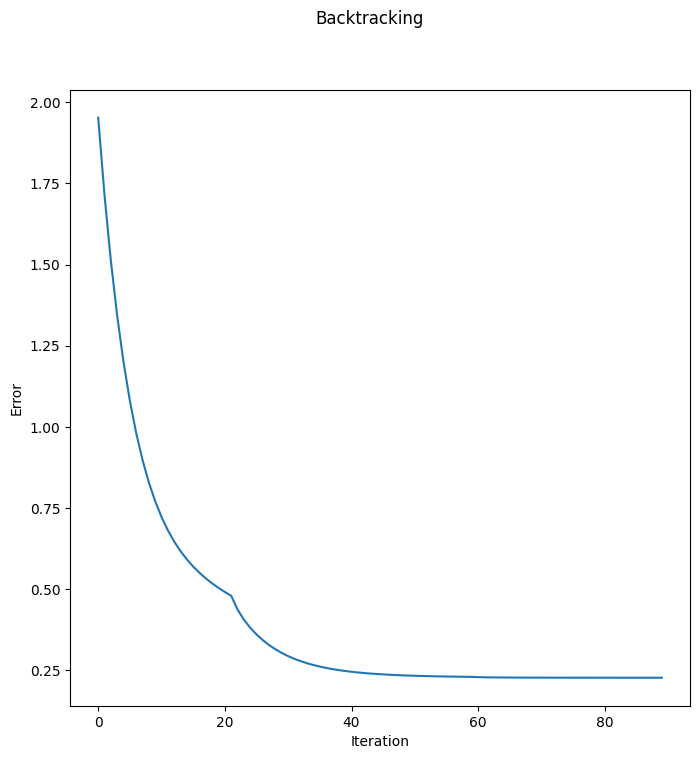

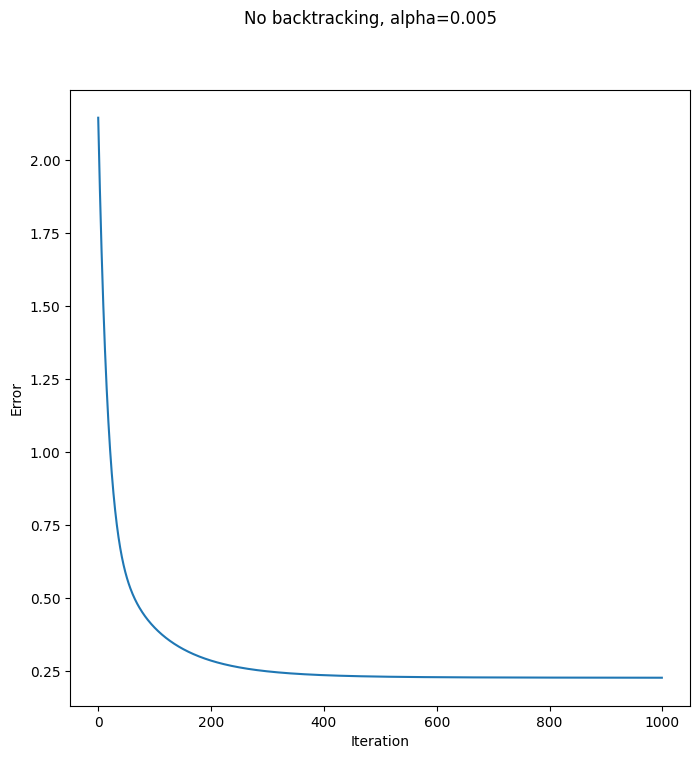

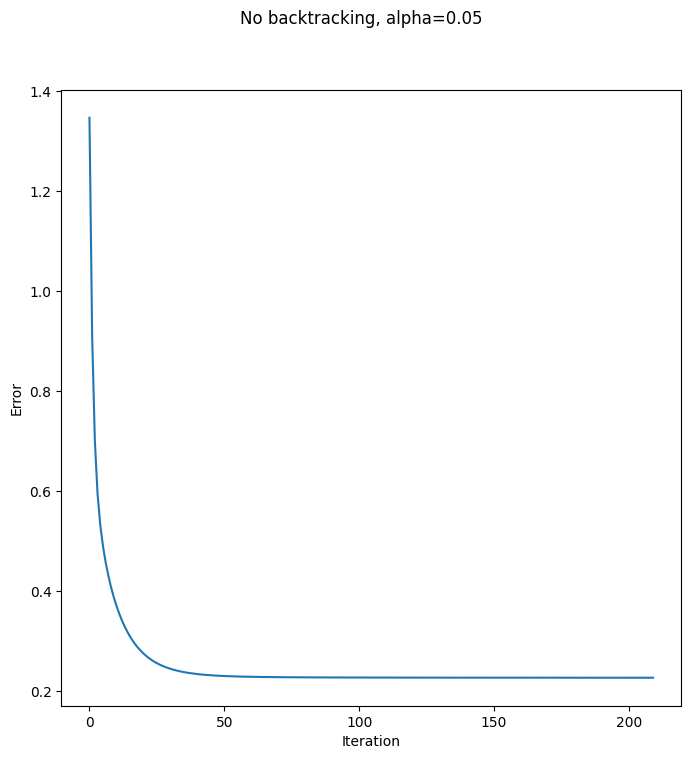

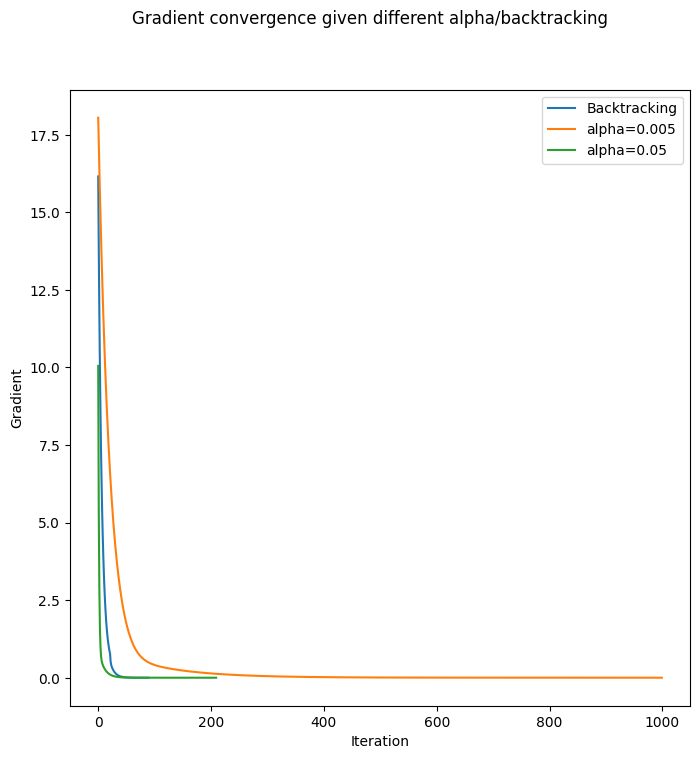

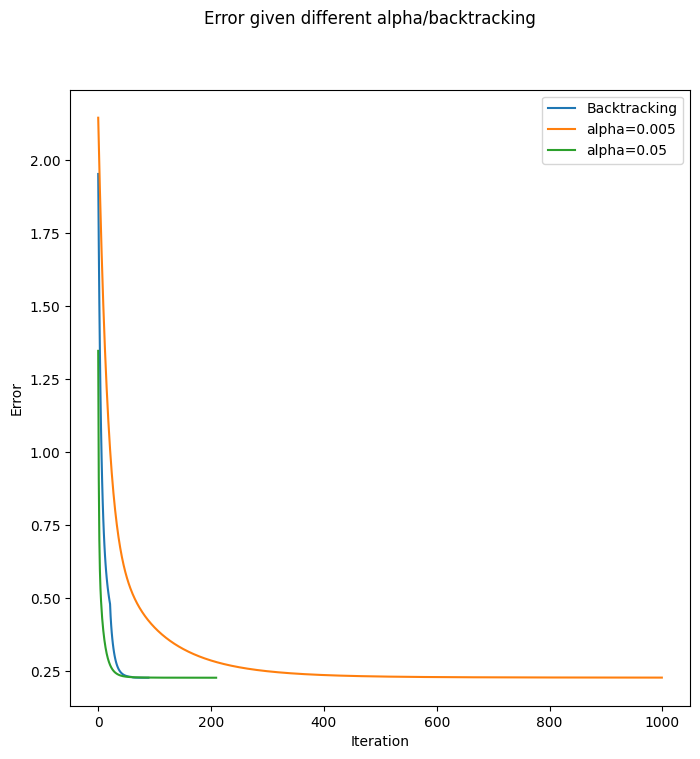

In [109]:
test_expanded_vandermonde(5, 0.5)


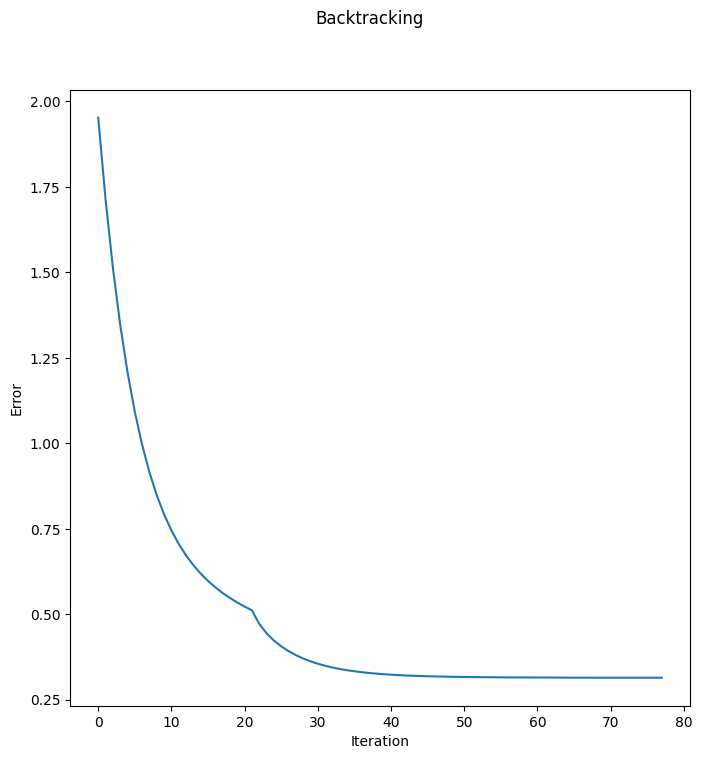

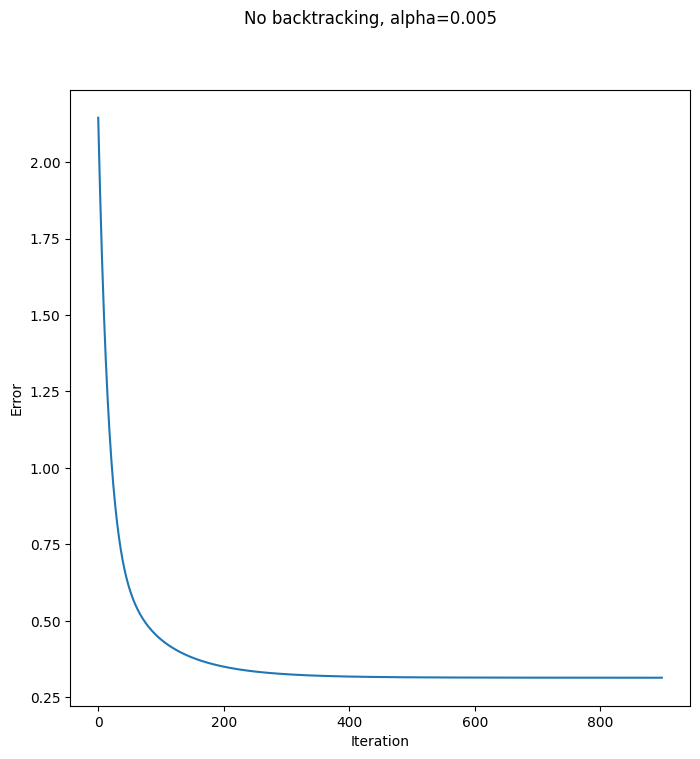

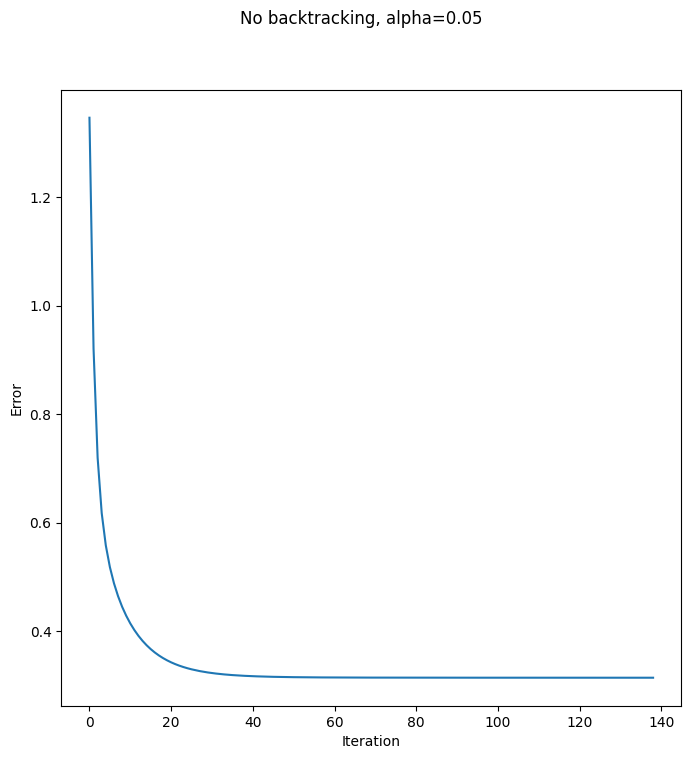

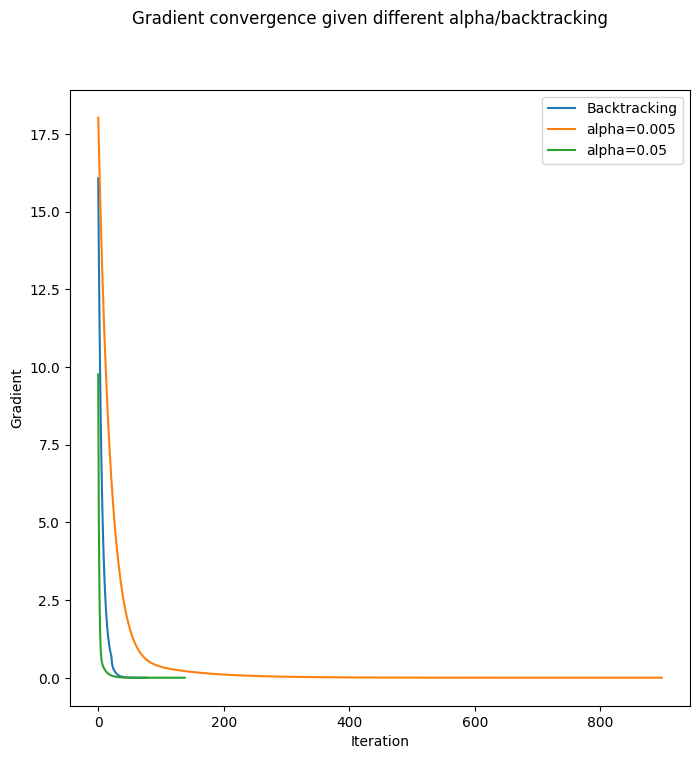

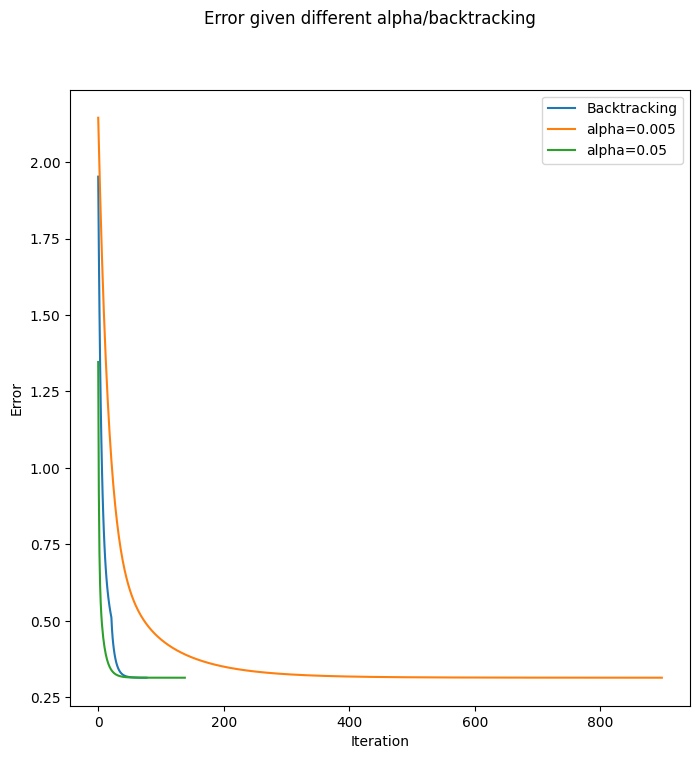

In [110]:
test_expanded_vandermonde(5, 0.8)


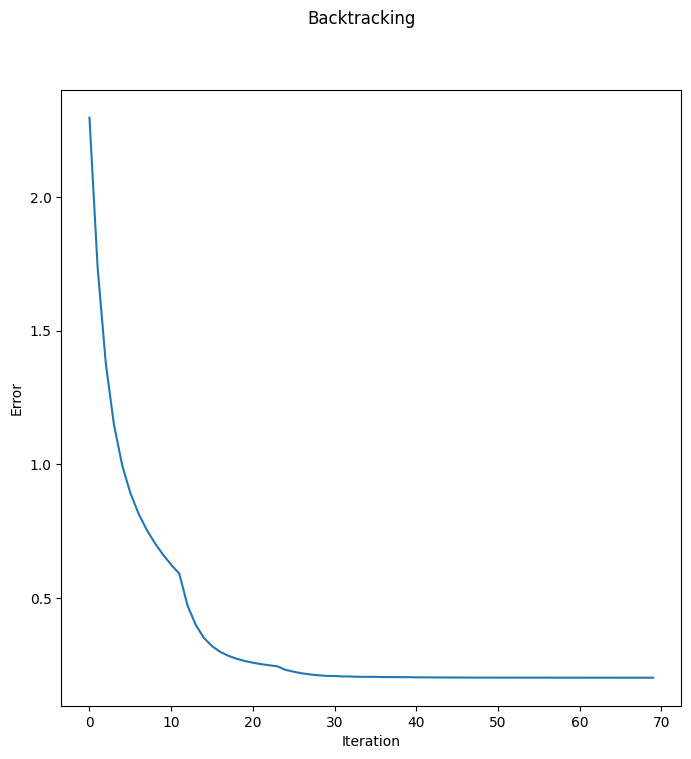

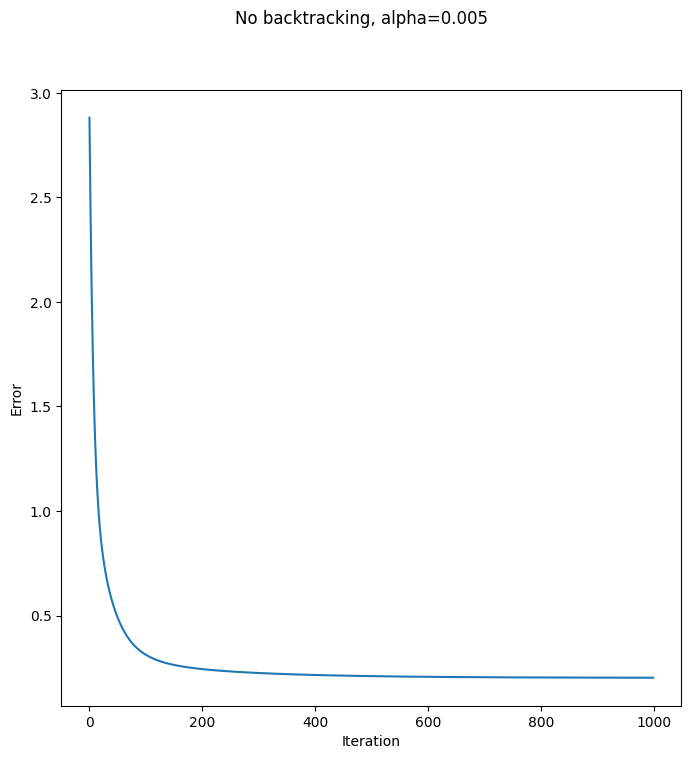

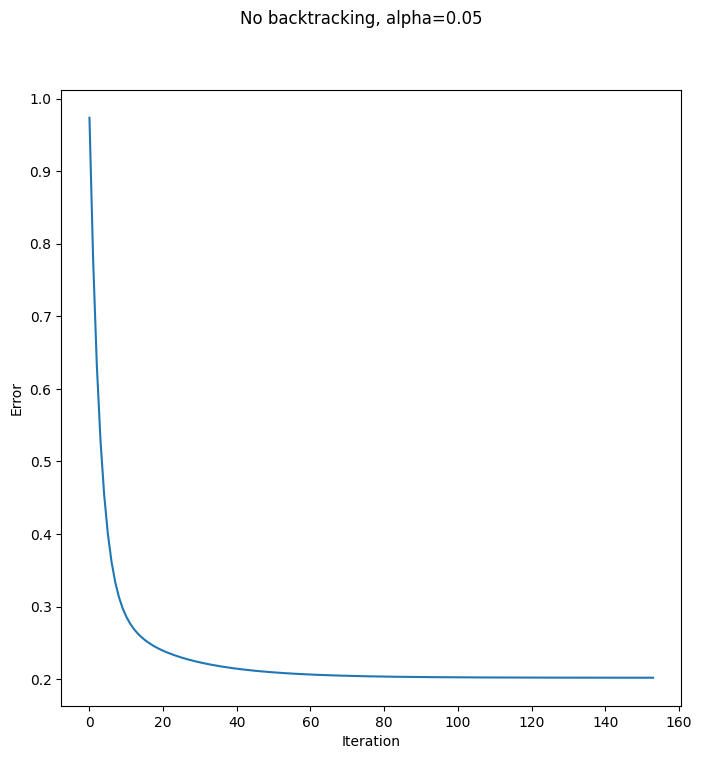

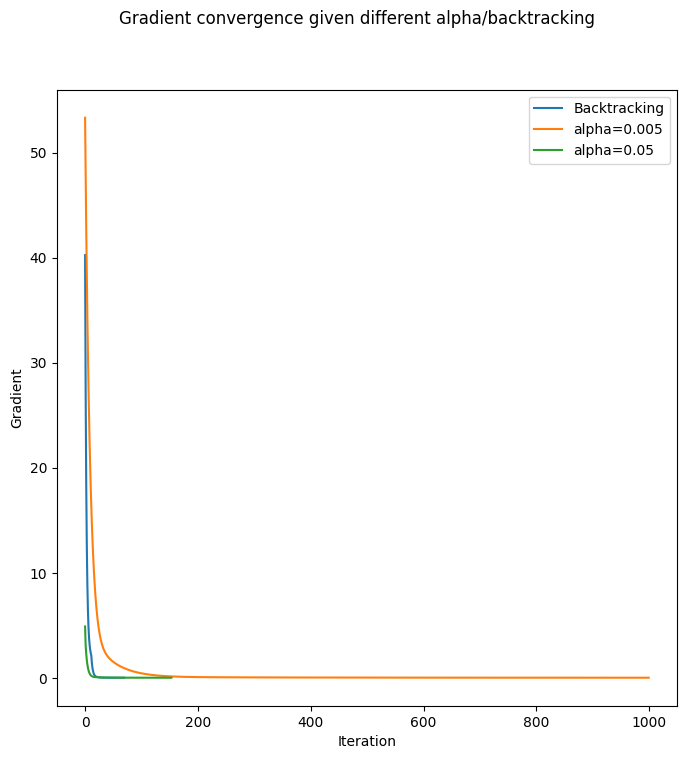

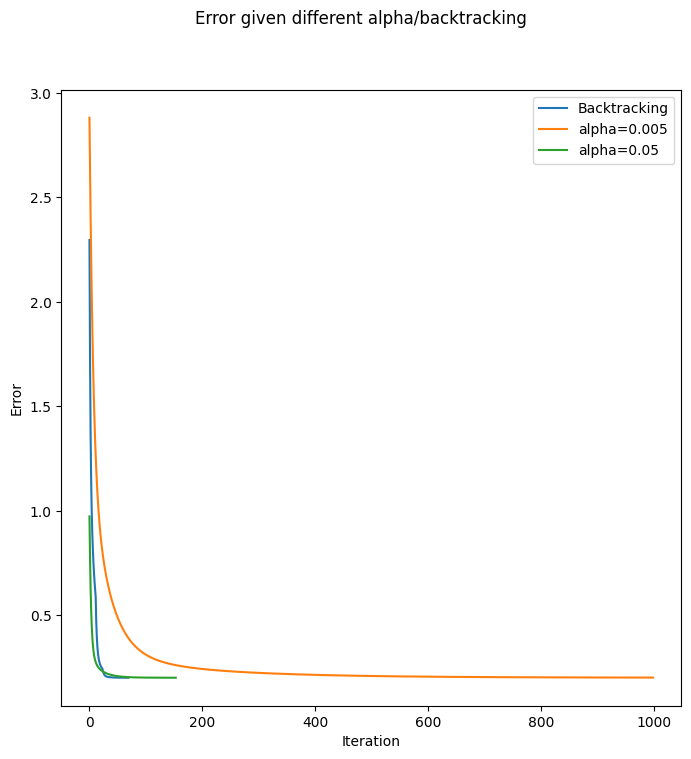

In [111]:
test_expanded_vandermonde(10, 0.5)

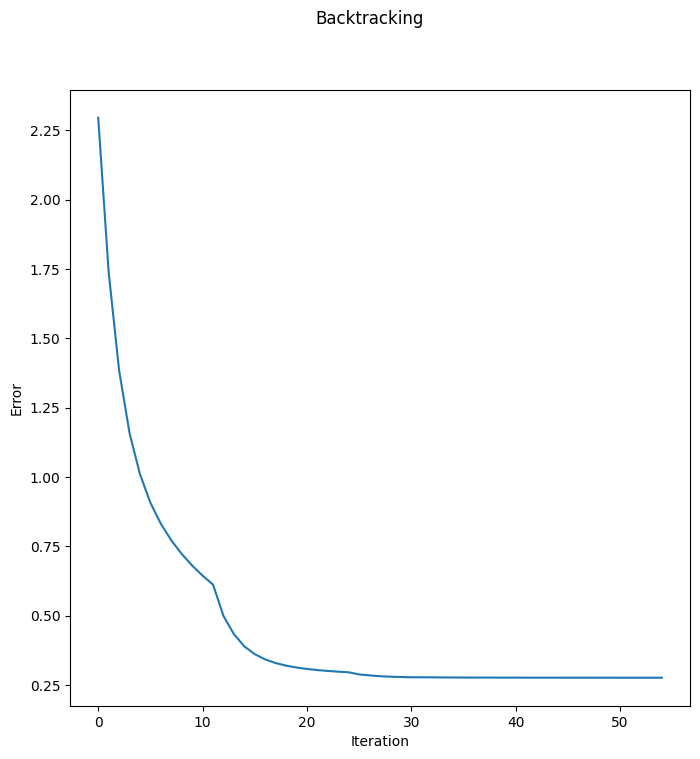

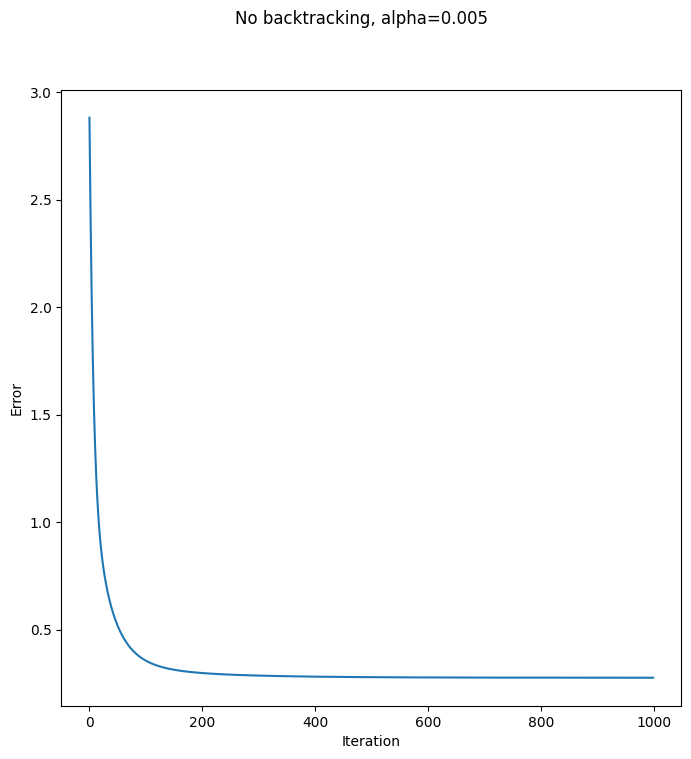

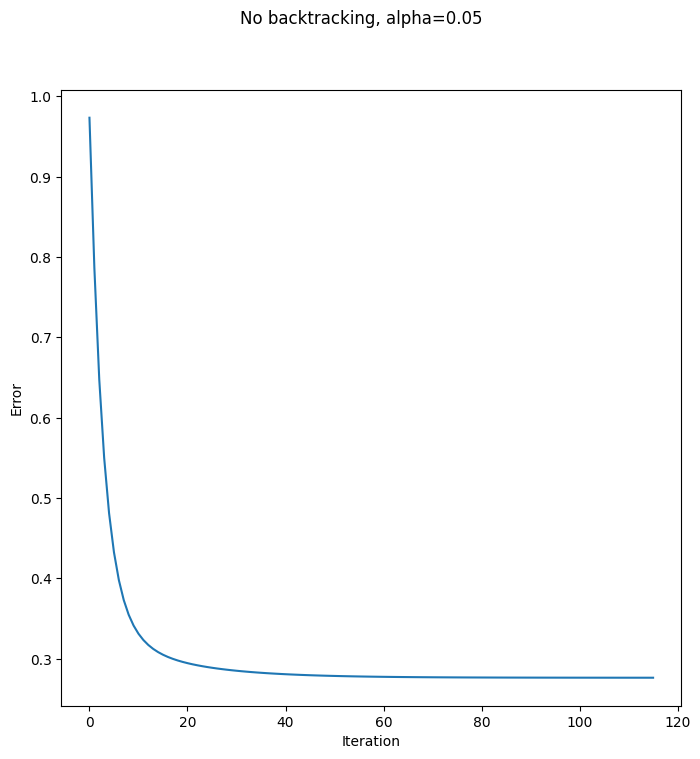

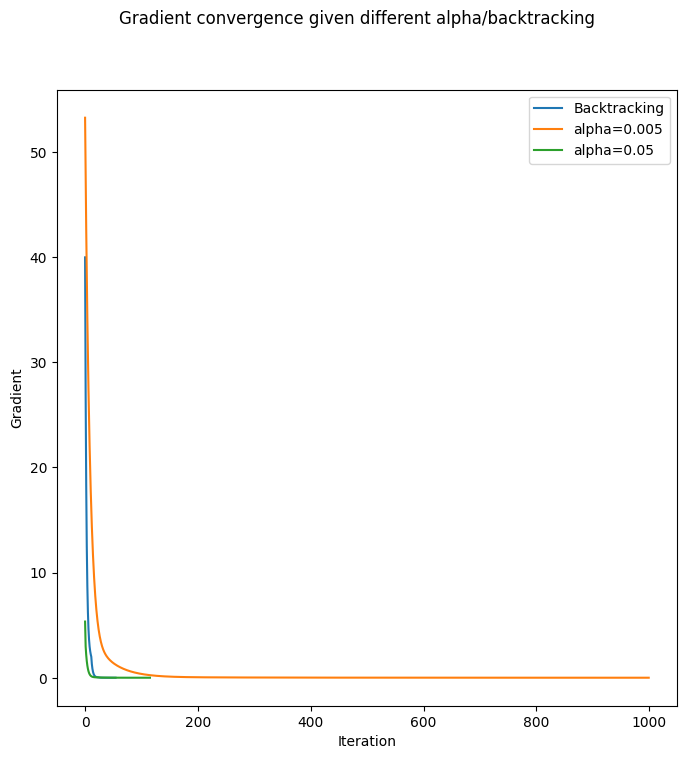

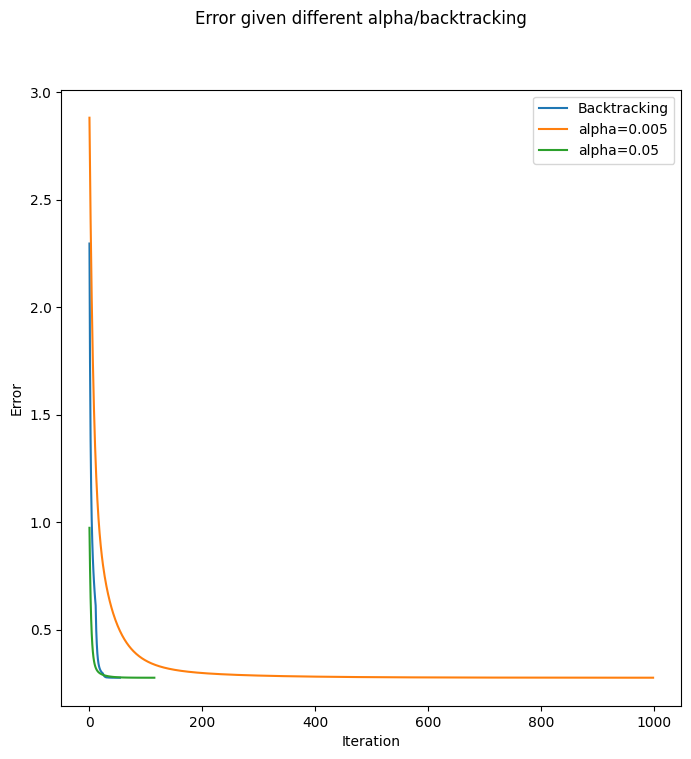

In [112]:
test_expanded_vandermonde(10, 0.8)

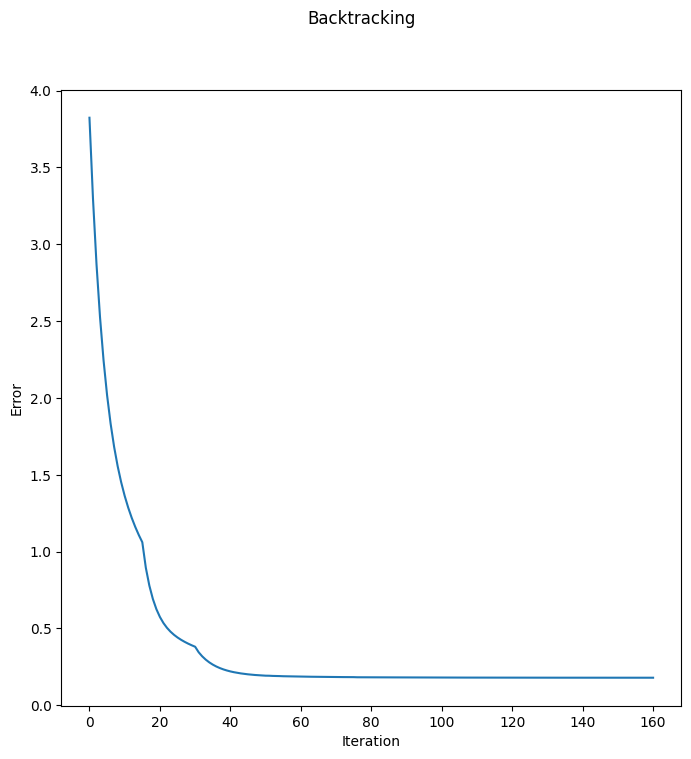

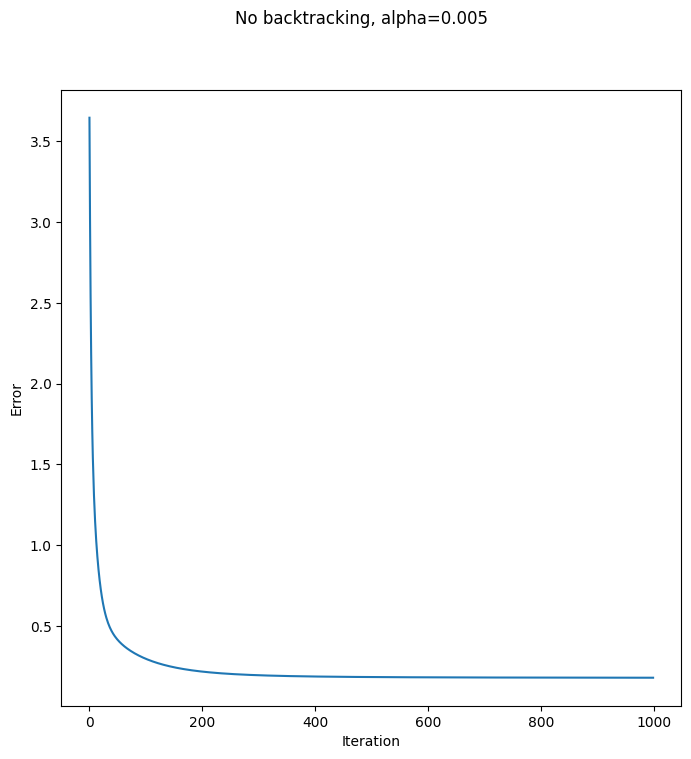

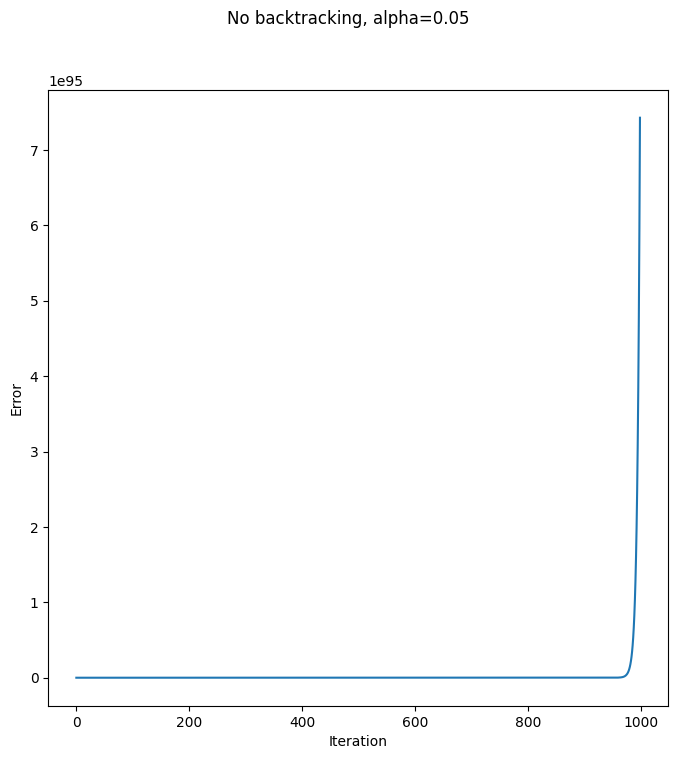

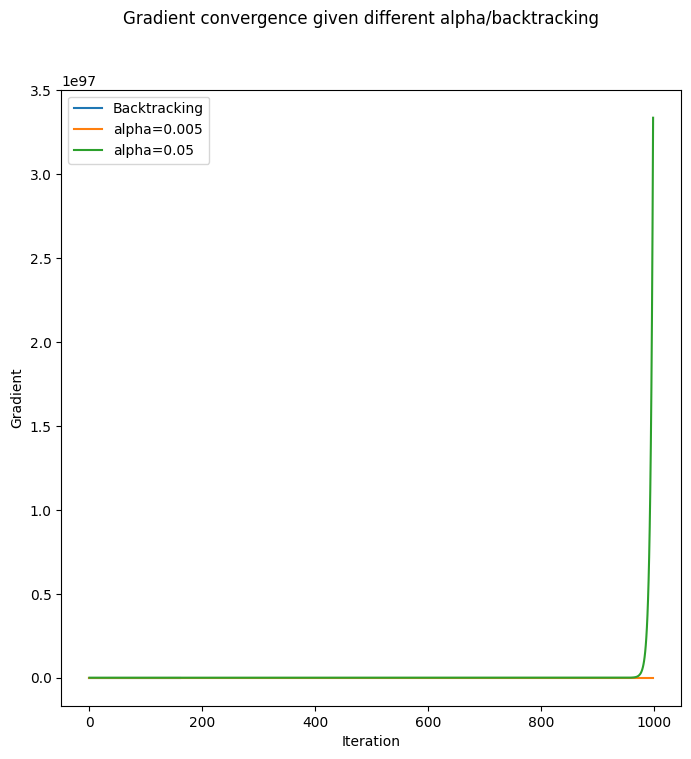

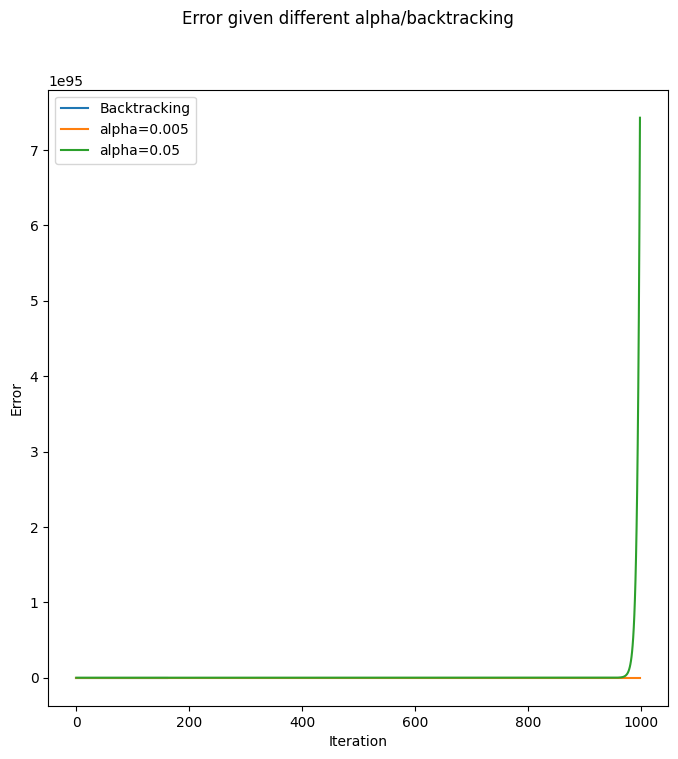

In [113]:
test_expanded_vandermonde(20, 0.5)

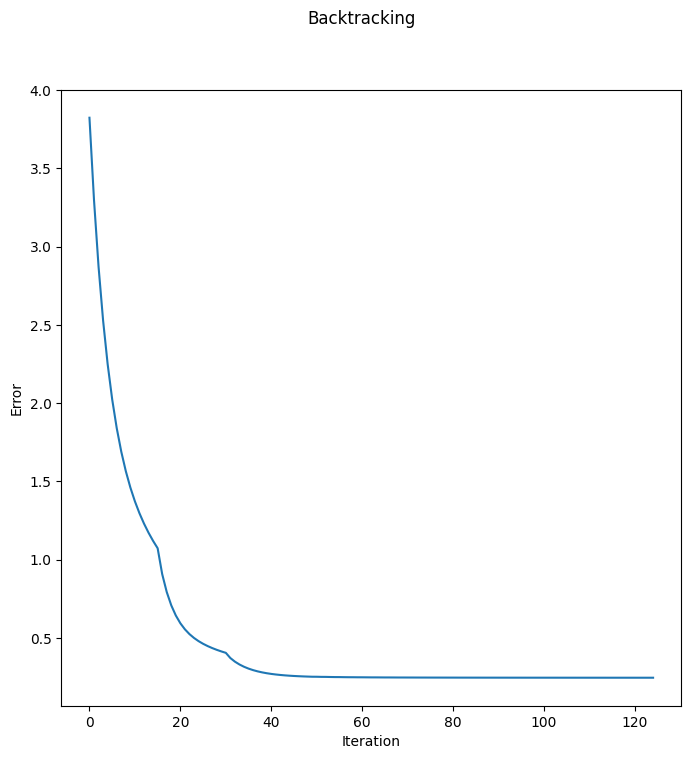

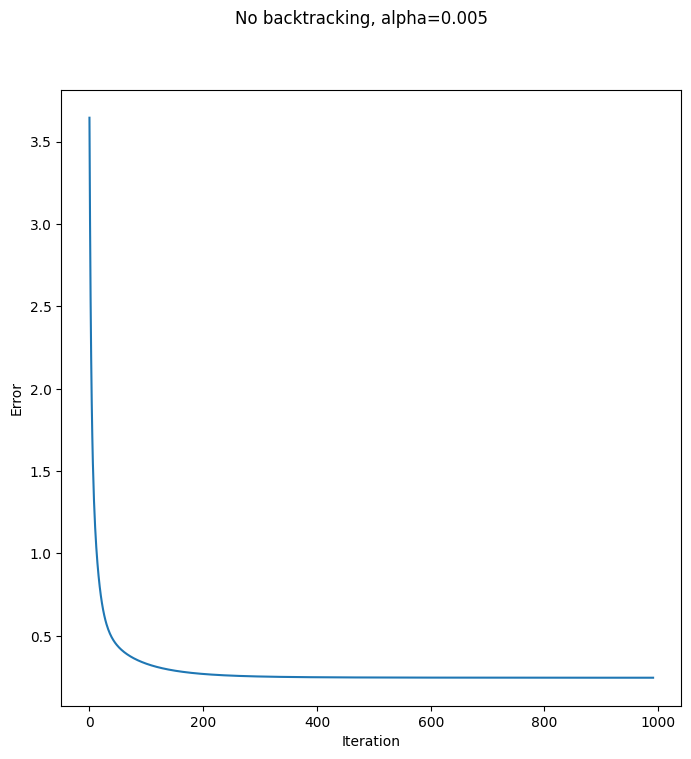

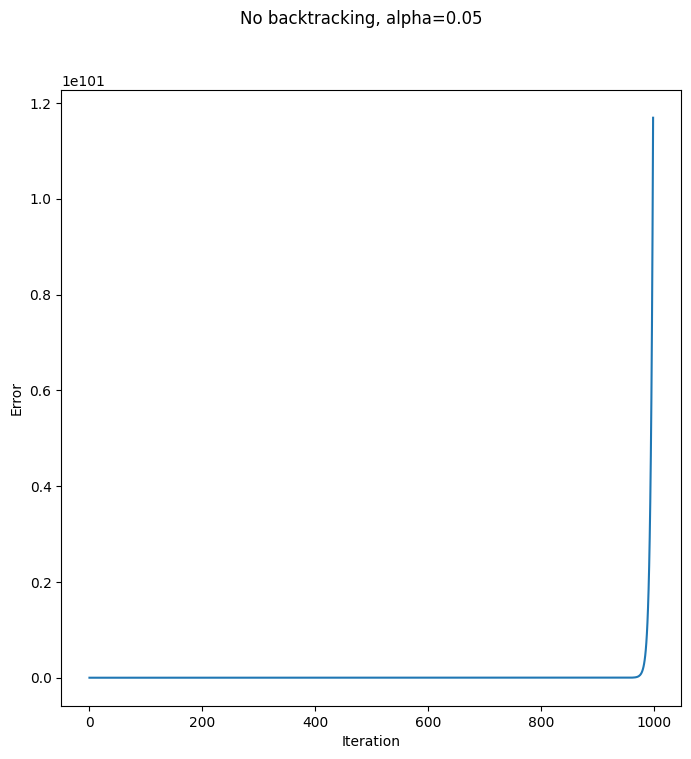

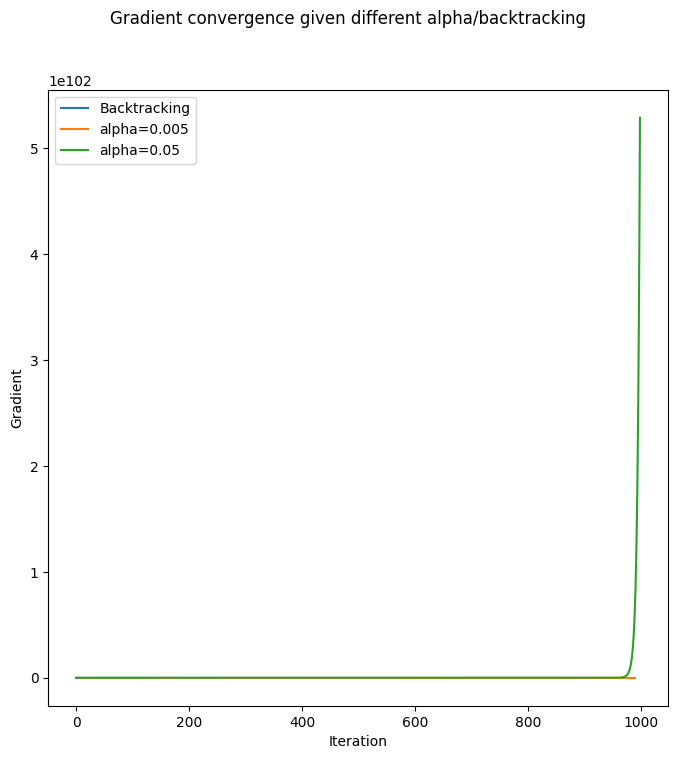

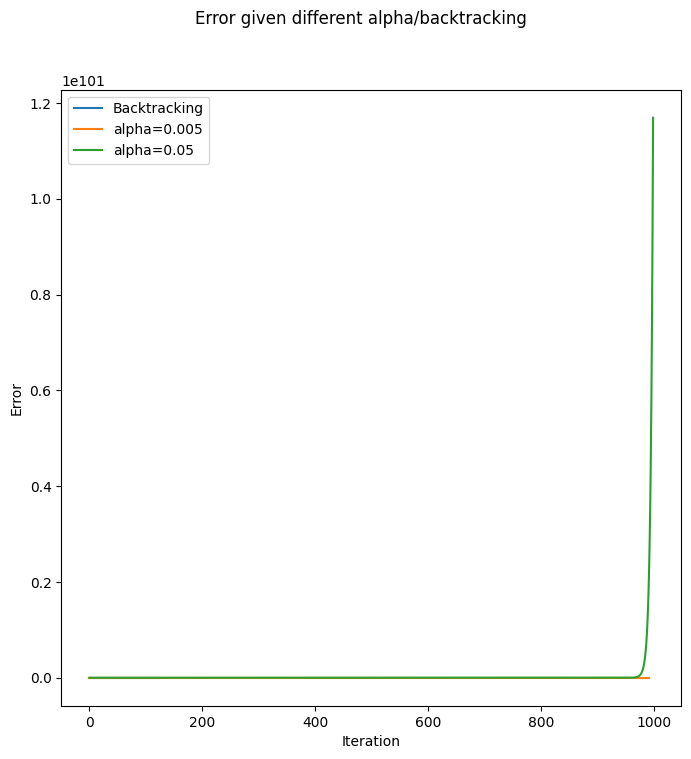

In [114]:
test_expanded_vandermonde(20, 0.8)

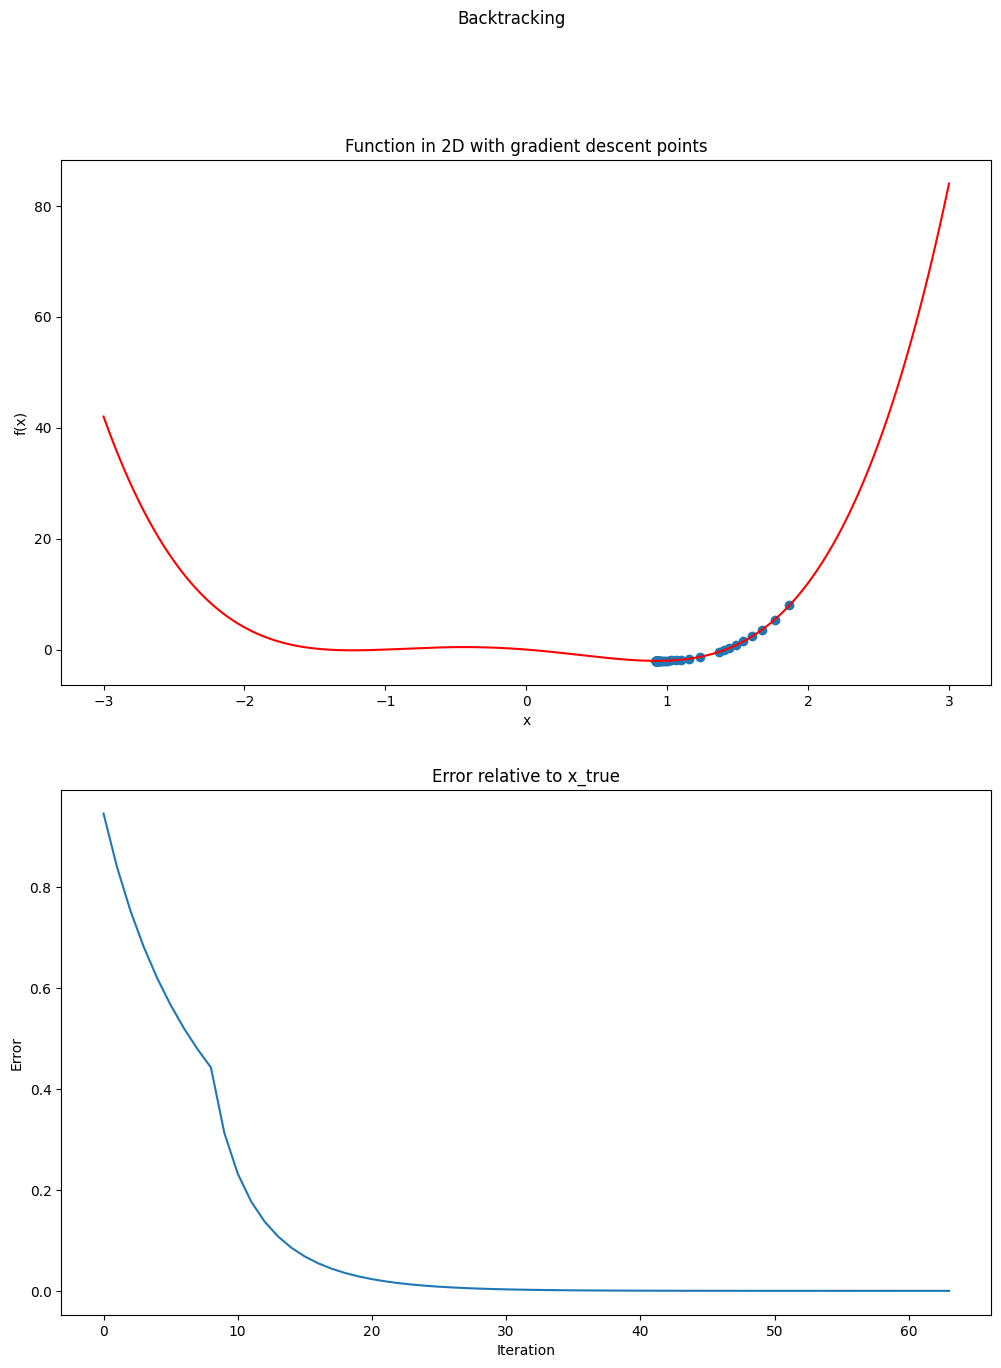

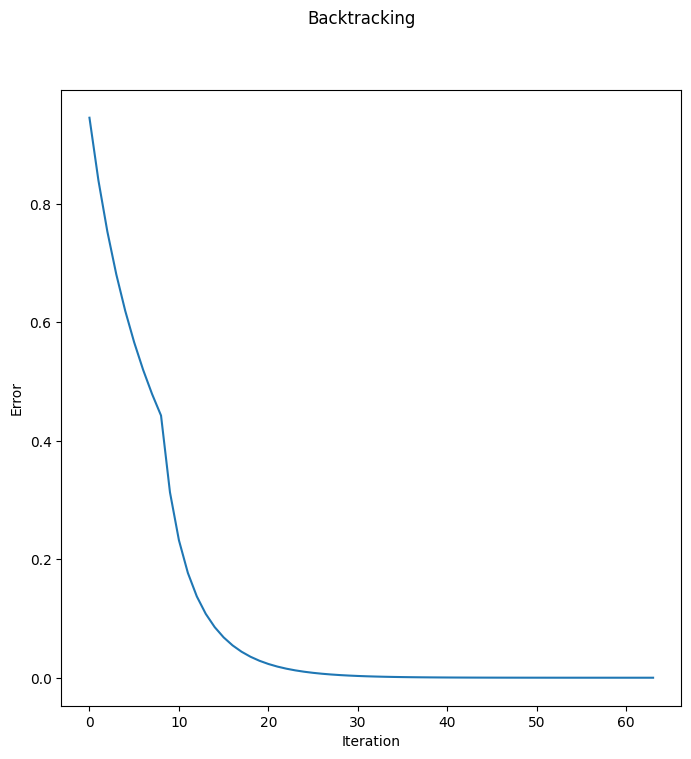

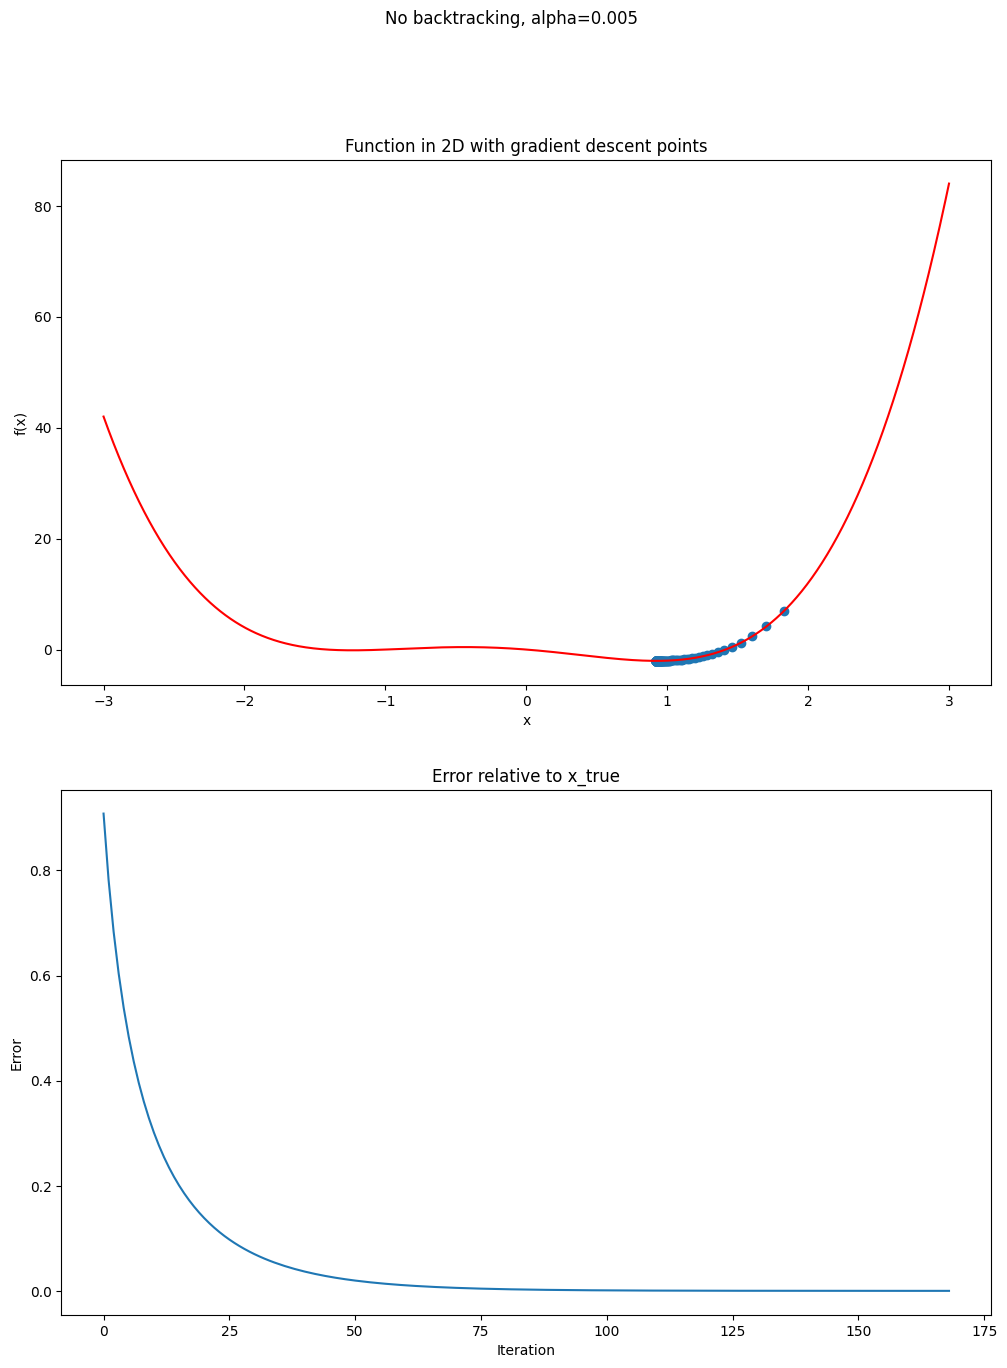

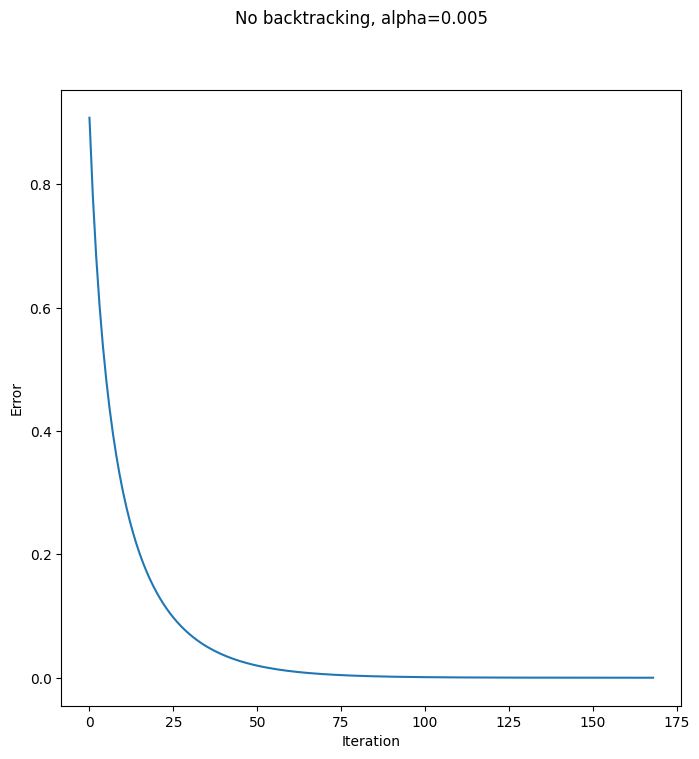

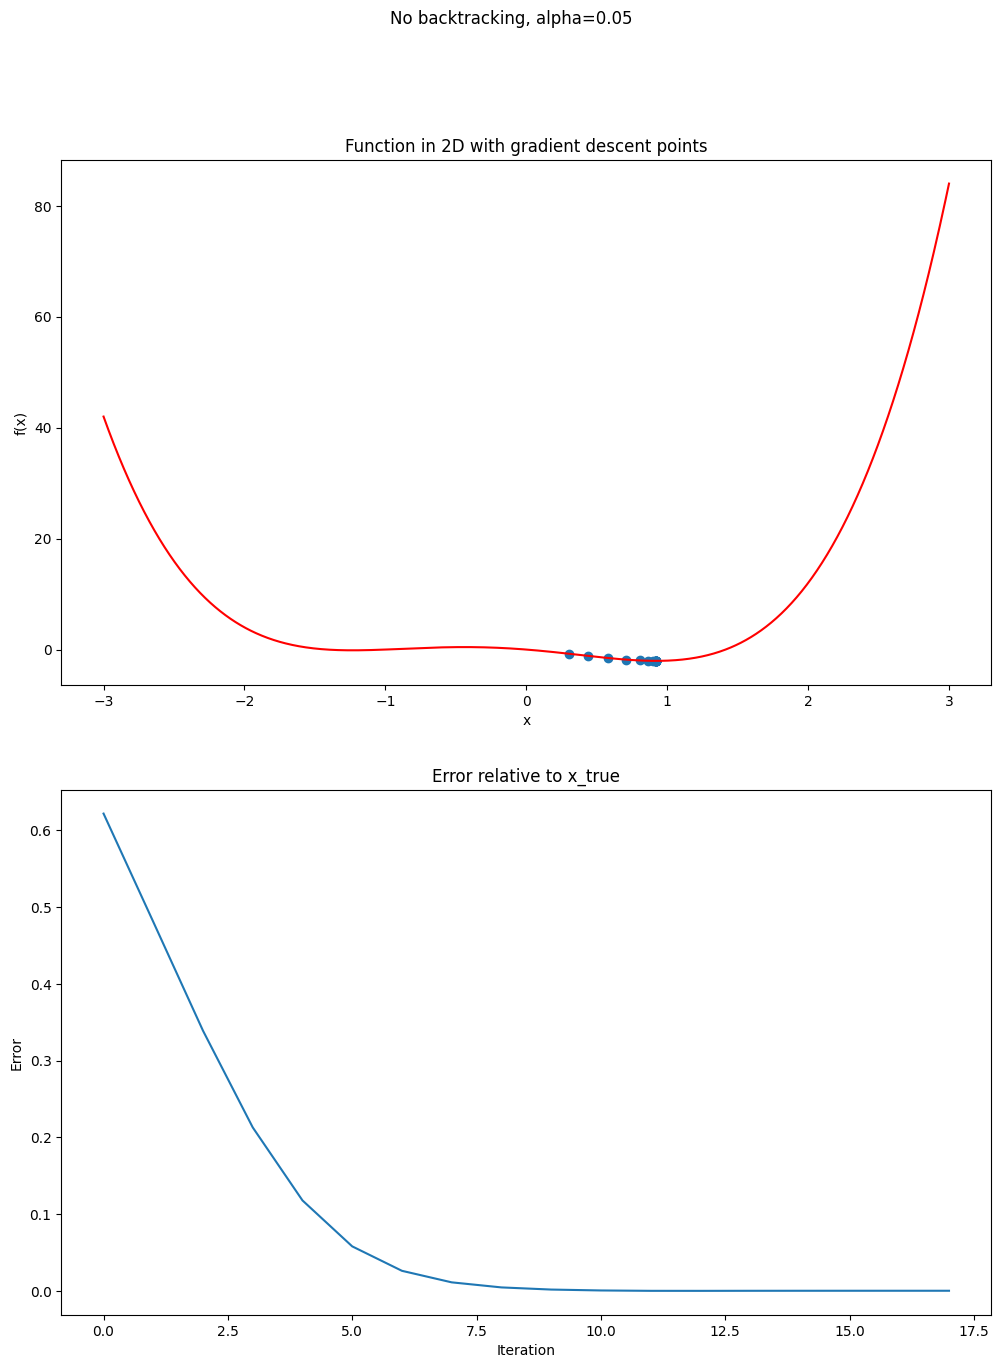

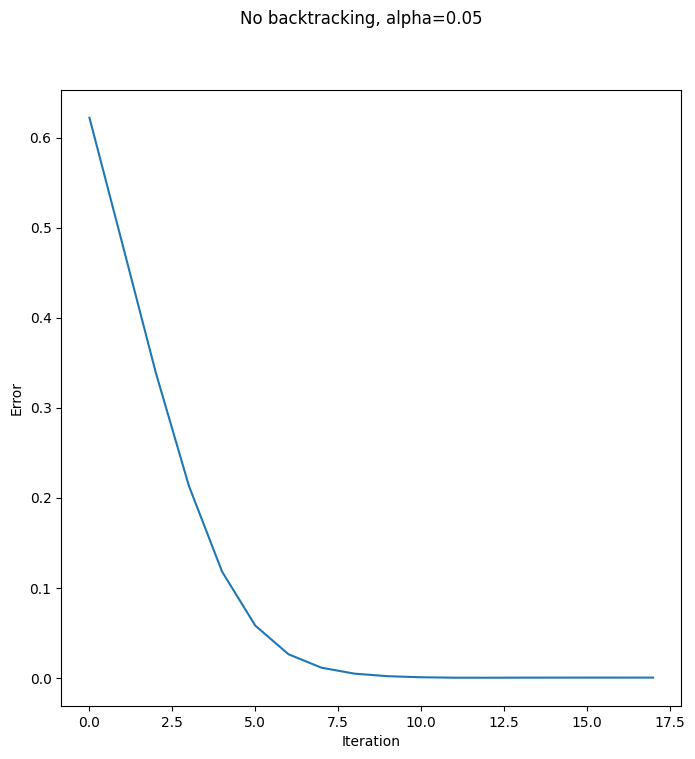

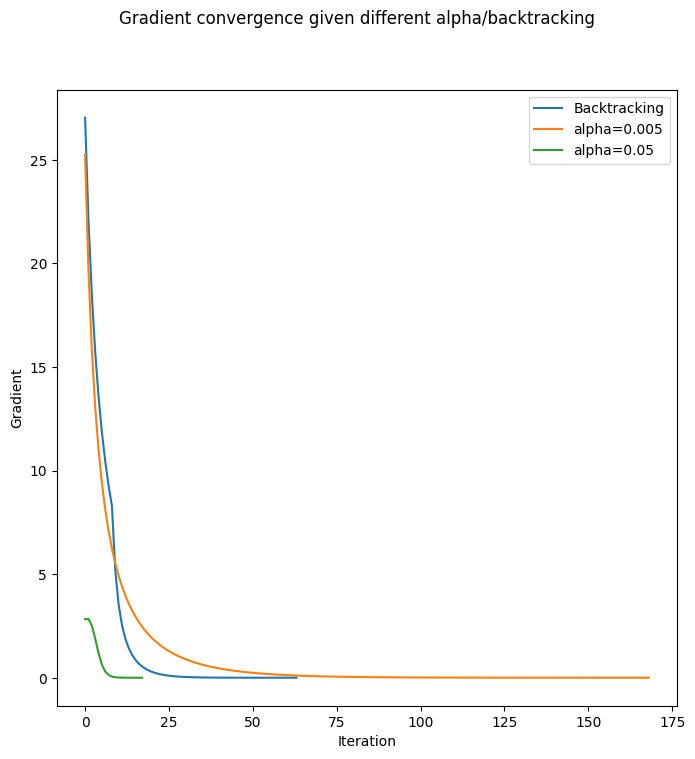

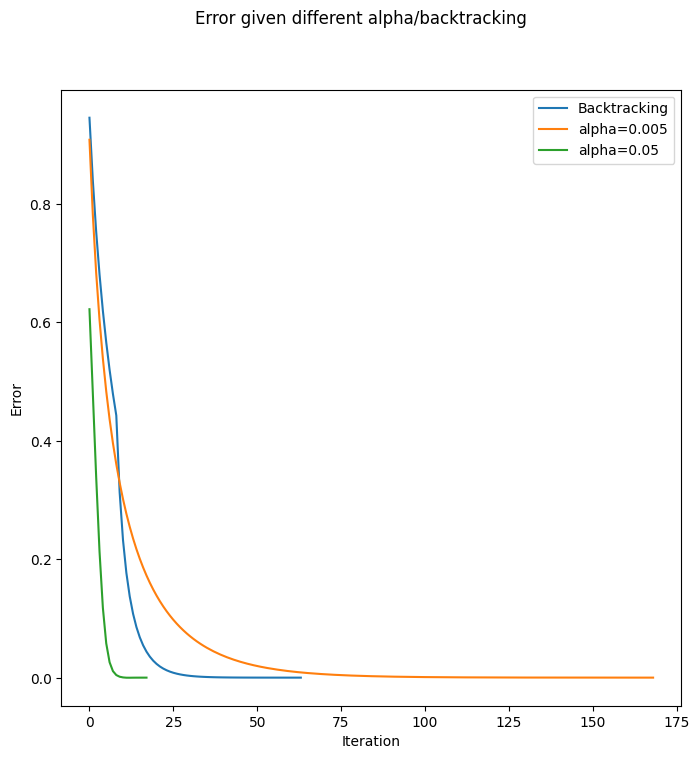

In [115]:
def f(x):
    return x**4 + x**3 - 2 * x**2 - 2 * x

def grad_f(x):
    return 4 * x**3 + 3 * x**2 - 4 * x - 2

test(f, grad_f, x_0=2, optimum=0.922, range_x=(-3,3), plot="2d")

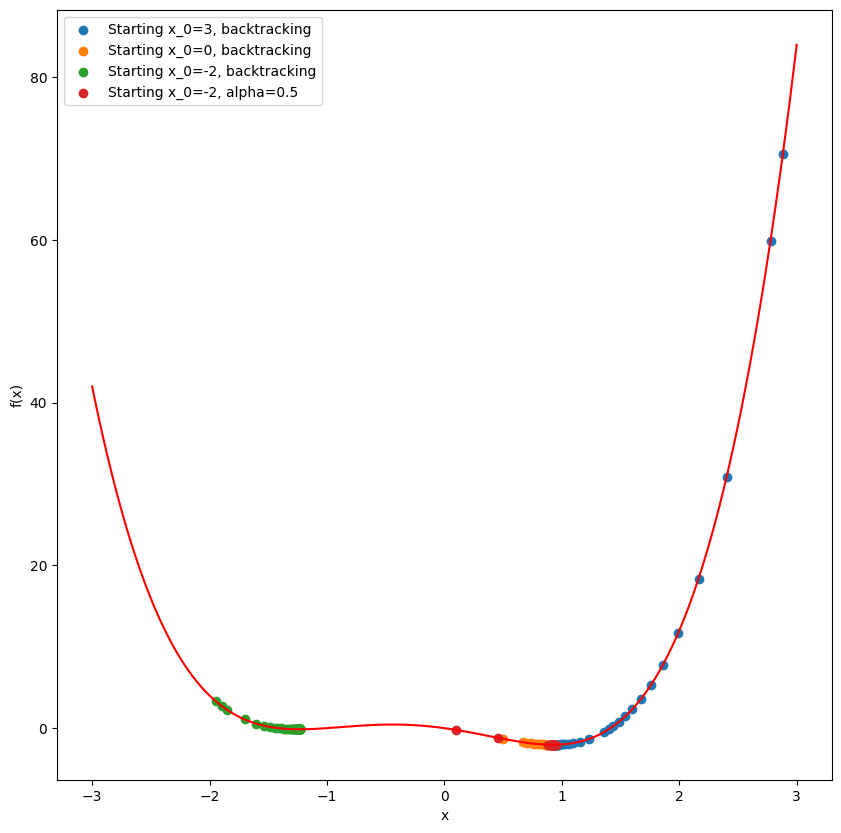

In [124]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)

plot_function_2D(f, range=(-3,3), ax=ax)

x_k, k, f_vals, grads, errs, x_ks = gradient_descent(f, grad_f, x_0=3, k_max=1000, tol_f=1e-6, tol_x=1e-6, backtracking_func=backtracking)
plot_gradient_descent_2D(x_ks, f_vals, ax=ax, label="Starting x_0=3, backtracking")

x_k, k, f_vals, grads, errs, x_ks = gradient_descent(f, grad_f, x_0=0, k_max=1000, tol_f=1e-6, tol_x=1e-6, backtracking_func=backtracking)
plot_gradient_descent_2D(x_ks, f_vals, ax=ax, label="Starting x_0=0, backtracking")

x_k, k, f_vals, grads, errs, x_ks = gradient_descent(f, grad_f, x_0=-2, k_max=1000, tol_f=1e-6, tol_x=1e-6, backtracking_func=backtracking)
plot_gradient_descent_2D(x_ks, f_vals, ax=ax, label="Starting x_0=-2, backtracking")

x_k, k, f_vals, grads, errs, x_ks = gradient_descent(f, grad_f, x_0=-2, k_max=1000, tol_f=1e-6, tol_x=1e-6, alpha=.15)
plot_gradient_descent_2D(x_ks, f_vals, ax=ax, label="Starting x_0=-2, alpha=0.5")

ax.legend();


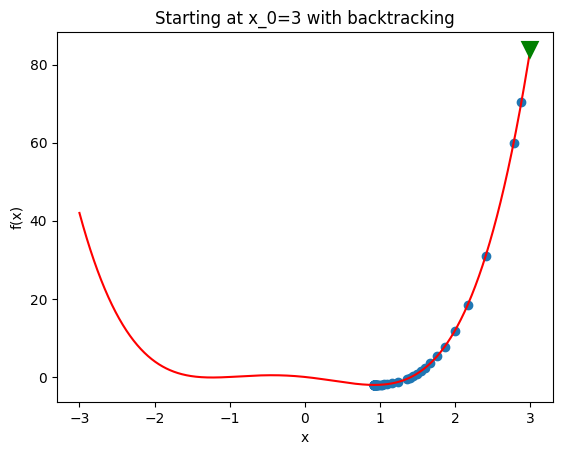

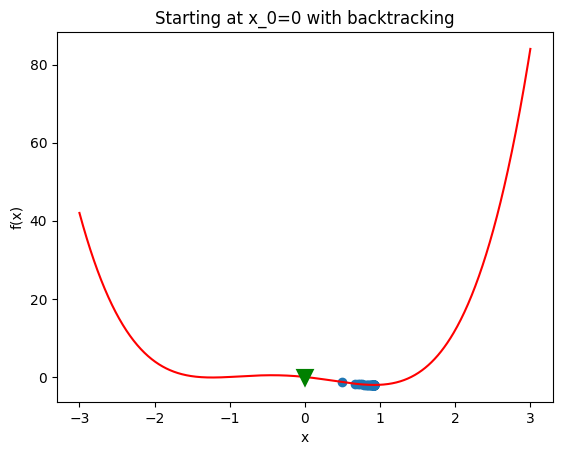

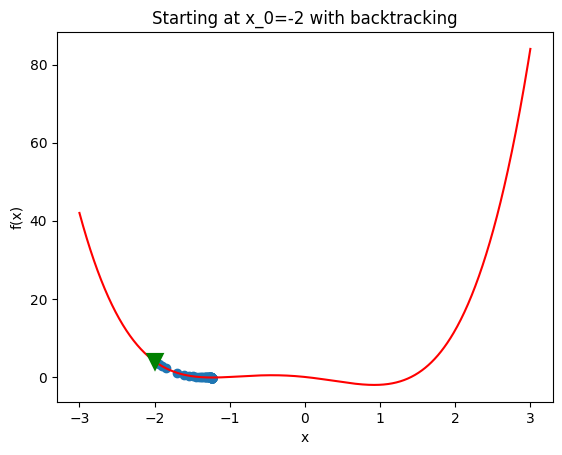

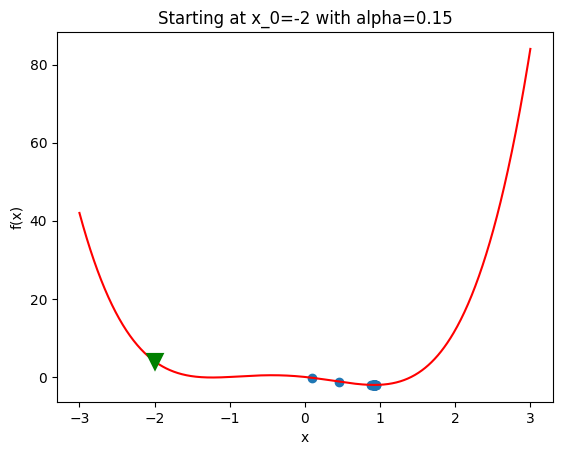

In [138]:
x_0 = 3
x_k, k, f_vals, grads, errs, x_ks = gradient_descent(f, grad_f, x_0=x_0, k_max=1000, tol_f=1e-6, tol_x=1e-6,
                                                     backtracking_func=backtracking)
plot_function_2D(f, range=(-3, 3))
plot_gradient_descent_2D(x_ks, f_vals)
plt.plot(x_0, f(x_0), marker='v', color="green", markersize=8, markeredgewidth=3)
plt.title(f"Starting at {x_0=} with backtracking")
plt.show()

x_0 = 0
x_k, k, f_vals, grads, errs, x_ks = gradient_descent(f, grad_f, x_0=x_0, k_max=1000, tol_f=1e-6, tol_x=1e-6,
                                                     backtracking_func=backtracking)
plot_function_2D(f, range=(-3, 3))
plot_gradient_descent_2D(x_ks, f_vals)
plt.plot(x_0, f(x_0), marker='v', color="green", markersize=8, markeredgewidth=3)
plt.title(f"Starting at {x_0=} with backtracking")
plt.show()

x_0 = -2
x_k, k, f_vals, grads, errs, x_ks = gradient_descent(f, grad_f, x_0=x_0, k_max=1000, tol_f=1e-6, tol_x=1e-6,
                                                     backtracking_func=backtracking)
plot_function_2D(f, range=(-3, 3))
plot_gradient_descent_2D(x_ks, f_vals)
plt.plot(x_0, f(x_0), marker='v', color="green", markersize=8, markeredgewidth=3)
plt.title(f"Starting at {x_0=} with backtracking")
plt.show()

x_0 = -2
alpha = 0.15
x_k, k, f_vals, grads, errs, x_ks = gradient_descent(f, grad_f, x_0=x_0, k_max=1000, tol_f=1e-6, tol_x=1e-6,
                                                     alpha=alpha)
plot_function_2D(f, range=(-3, 3))
plot_gradient_descent_2D(x_ks, f_vals)
plt.plot(x_0, f(x_0), marker='v', color="green", markersize=8, markeredgewidth=3)
plt.title(f"Starting at {x_0=} with {alpha=}")
plt.show()

<h1> Optimization via Stochastic Gradient Descent </h1>